In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import ccode.tools as tl
import ccode.plotting as pt
import ccode.solvers as sl

In [7]:
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [8]:
params = sl.junction_parameters(m_nw=np.array([-2, 0, -2]), m_qd=-2, bx=0.011)
a = params['a']

# Geometrical dependence of MBS coupling in a trijunction
* Plots of couplings and average couplings for all angles and bands
* Plots of average couplings/10(?) first peaks as a function of band index and angle

# Rectangular cavity

In [9]:
exp_title = 'Rectangular cavity: '

## Length dependence

In [10]:
n_geometries = 10
lengths = np.linspace(10*a, 100*a, n_geometries)

In [11]:
geometries = 1e9*lengths
geometry_parameter = r'$L$[nm]'
path = '../data/rectangle_length/'

In [65]:
mus_qd = np.linspace(-0.002, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [66]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [70]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry, prominence=prominence))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [71]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

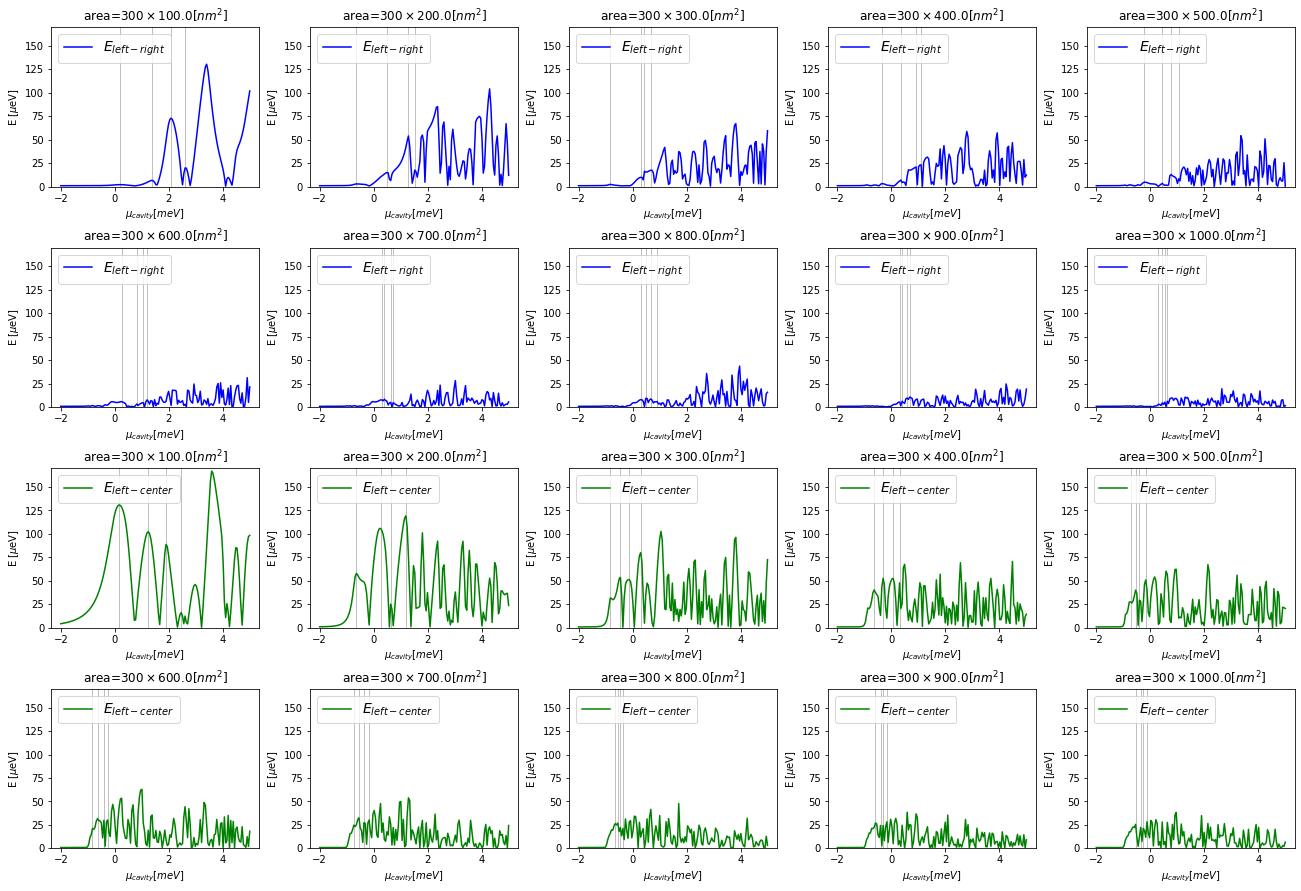

In [72]:
title = r'area=$300\times$'
units = r'[$nm^2$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

In [73]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

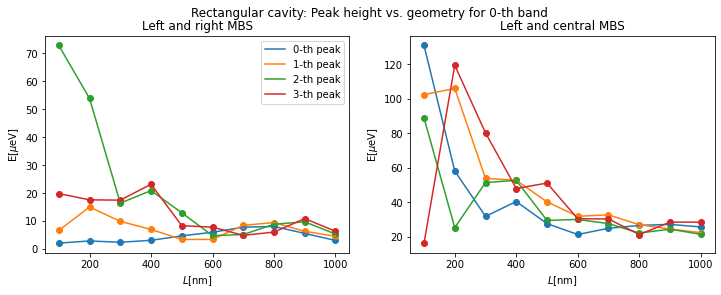

In [74]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

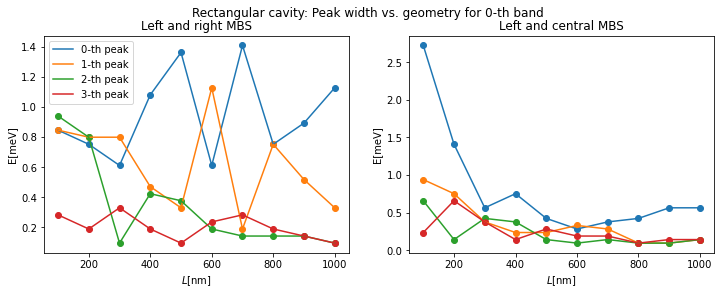

In [75]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

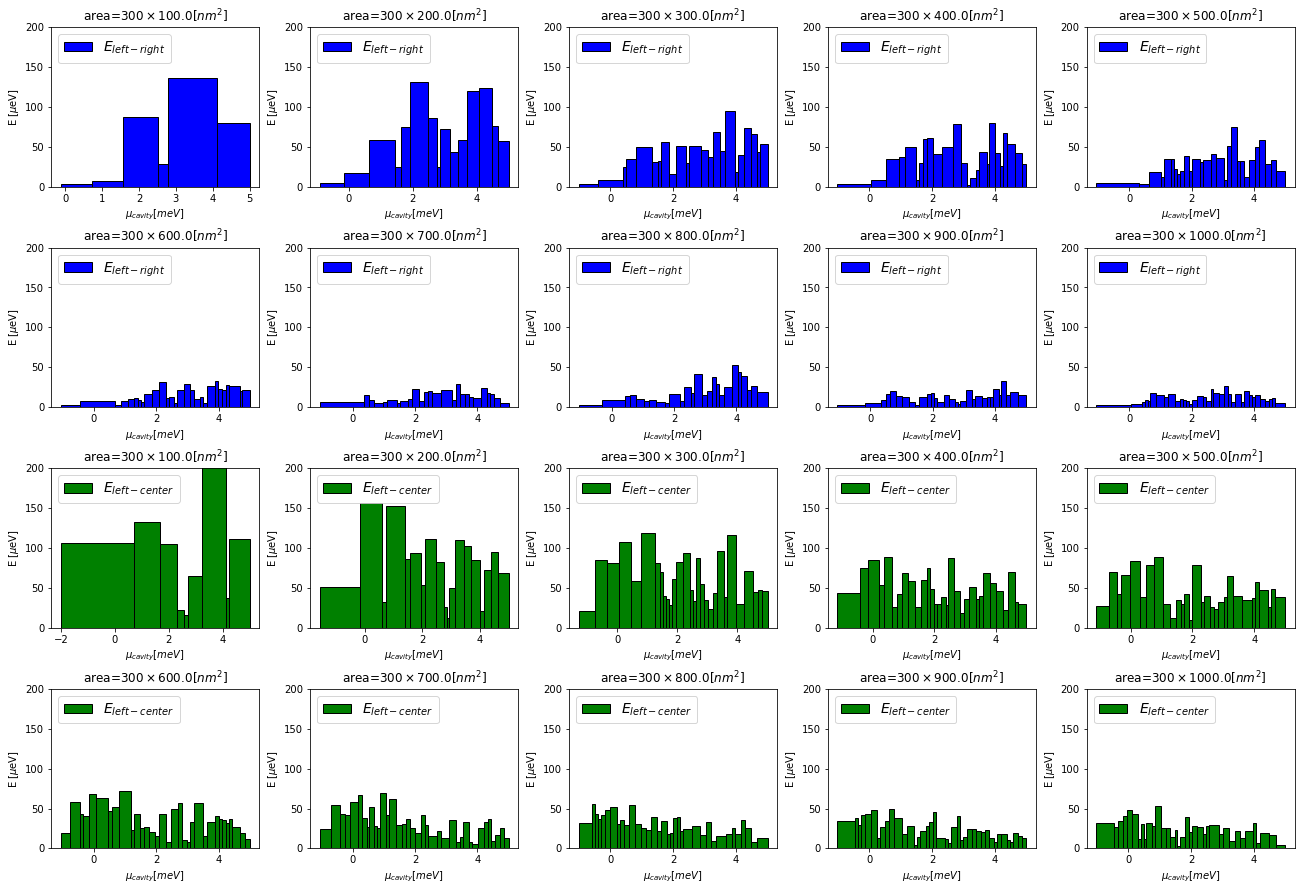

In [76]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [77]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        try:
            couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        except:
            couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [78]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [79]:
np.shape(bands_peaks)

(7, 10, 3, 4)

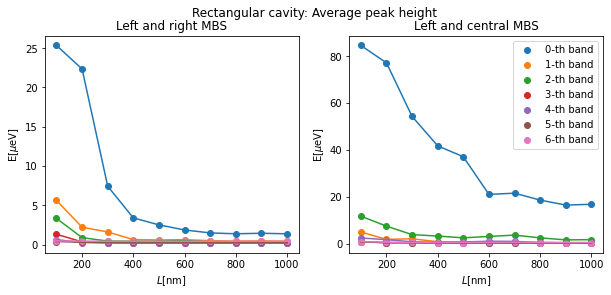

In [80]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

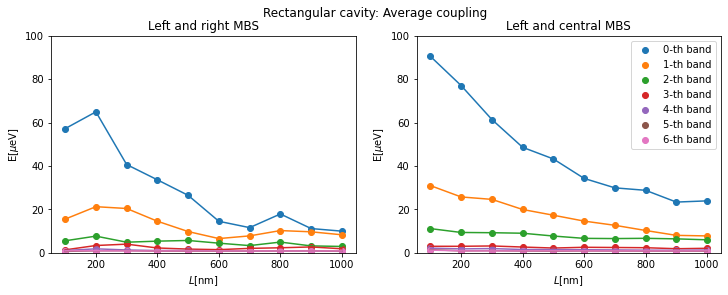

In [81]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

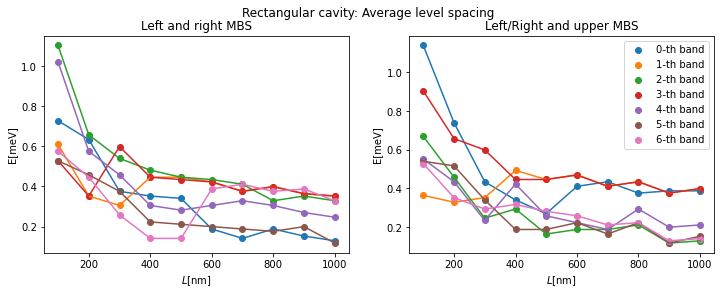

In [82]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

## Width dependence

In [23]:
n_geometries = 10
widths = np.linspace(30*a, 130*a, n_geometries)

In [24]:
geometries = 1e9*widths
geometry_parameter = r'$W$[nm]'
path = '../data/rectangle_width/'

In [25]:
mus_qd = np.linspace(-0.002, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [94]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [95]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [96]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

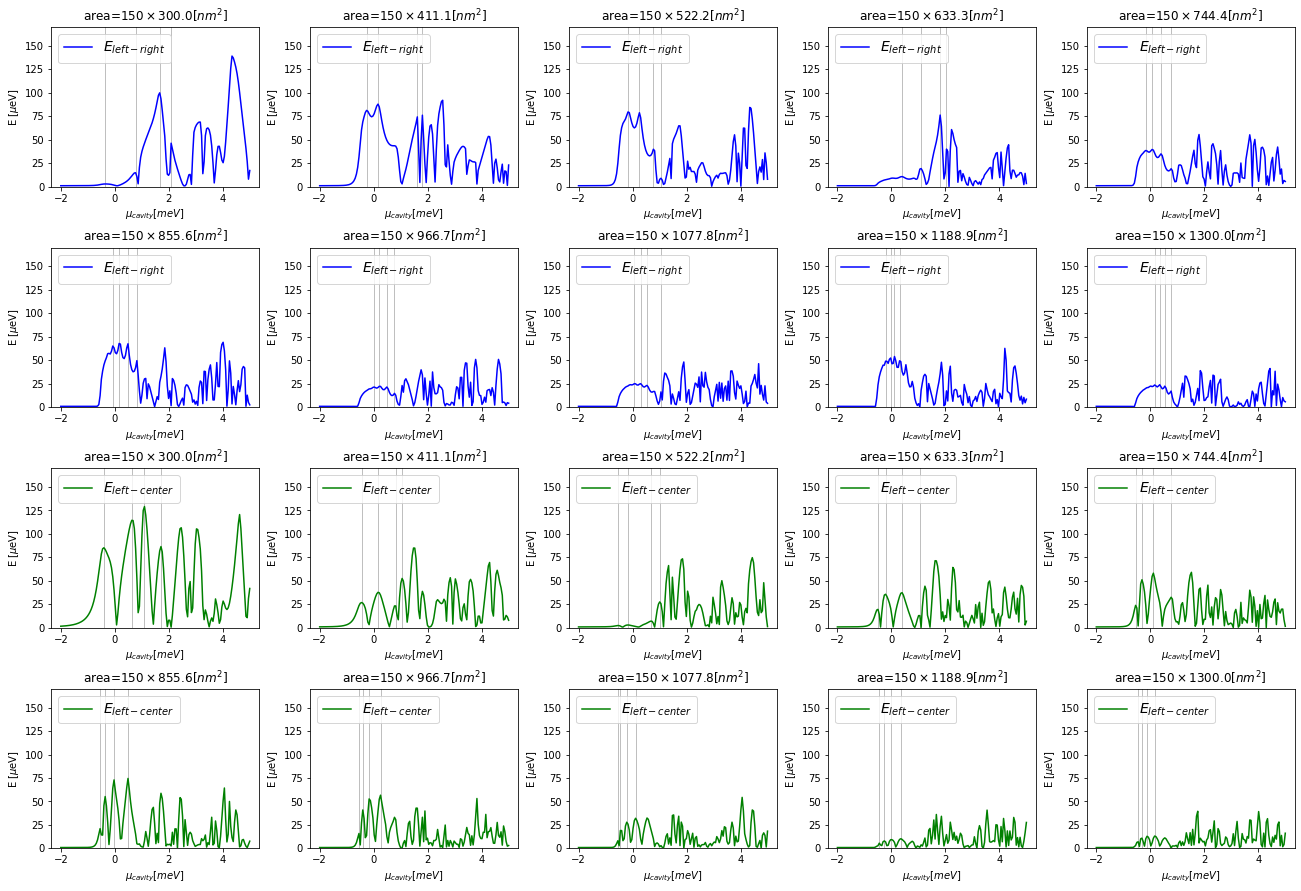

In [97]:
title = r'area=$150\times$'
units = r'[$nm^2$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

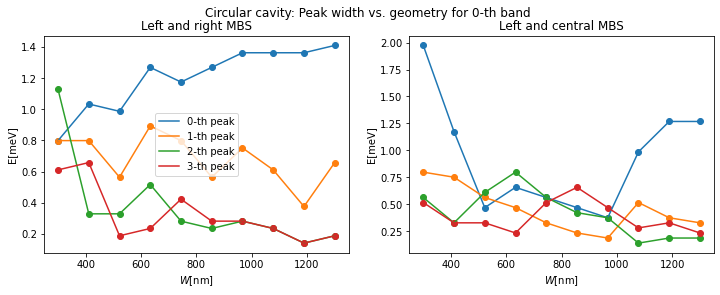

In [98]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

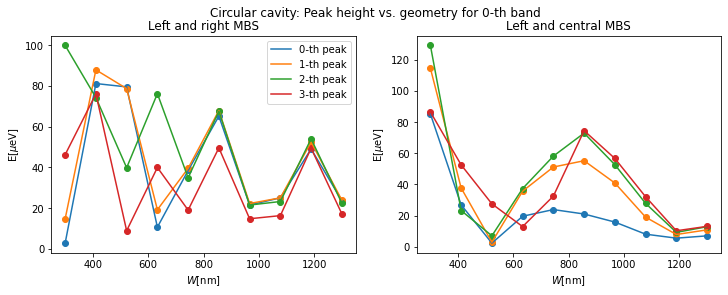

In [99]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title + r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

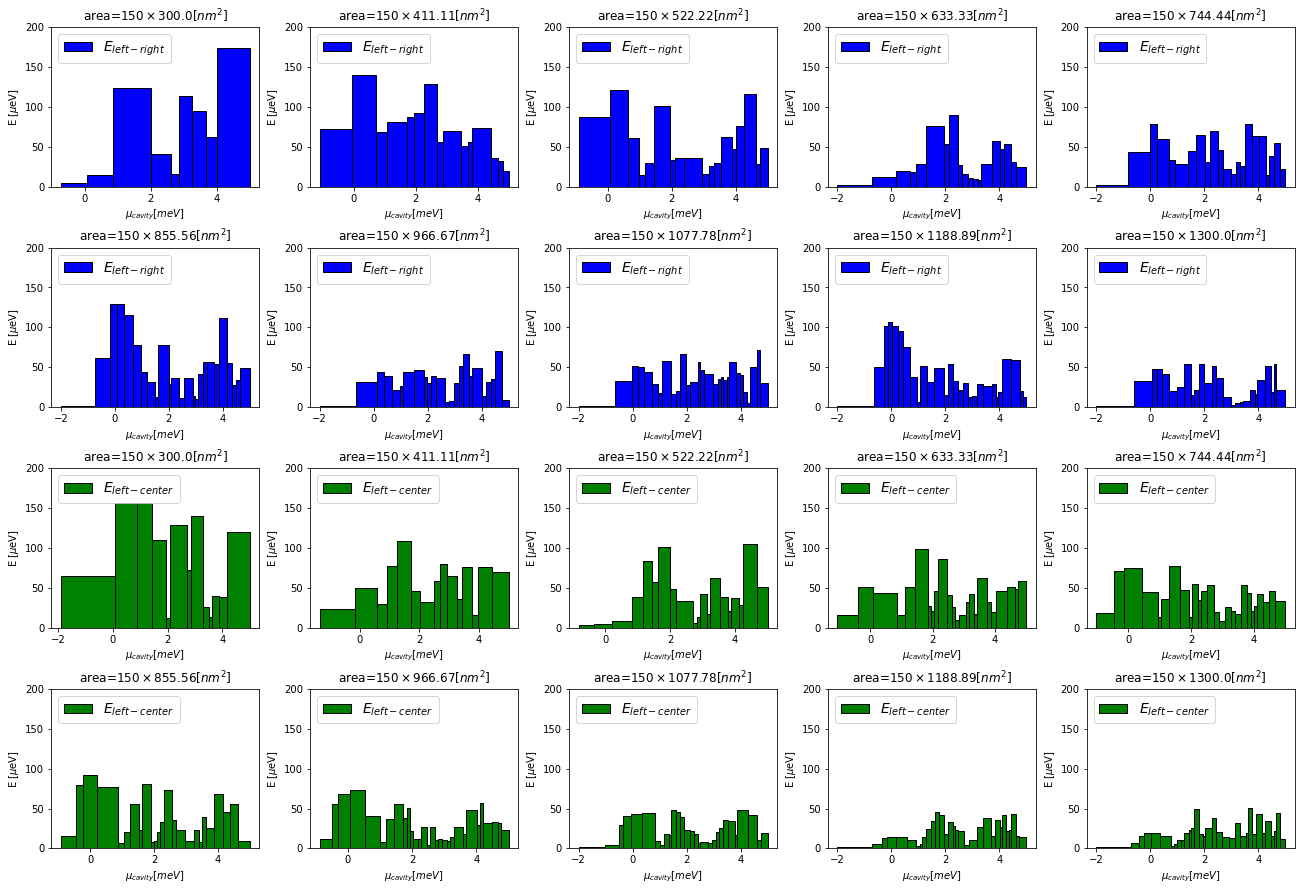

In [100]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [26]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [27]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

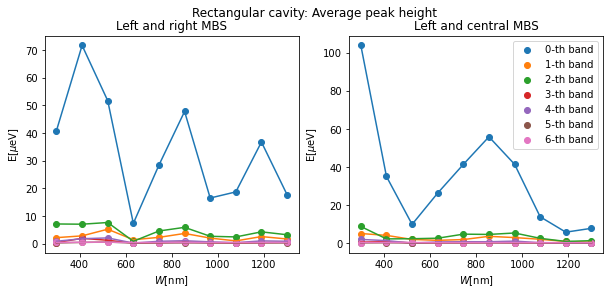

In [28]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

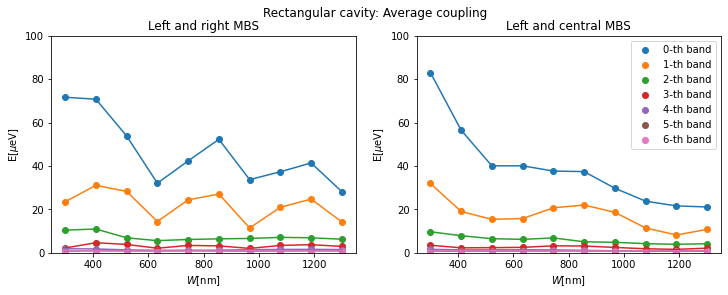

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

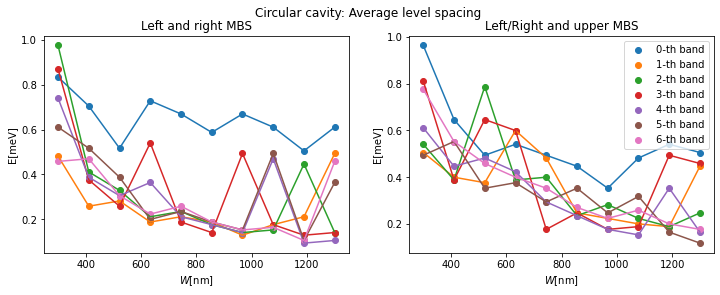

In [105]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

Text(0.5, 1.0, 'Left/Right and upper MBS')

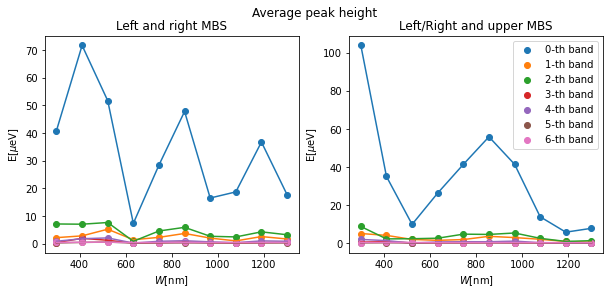

In [106]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig.suptitle(r'Average peak height')
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')

Text(0.5, 1.0, 'Left and central MBS')

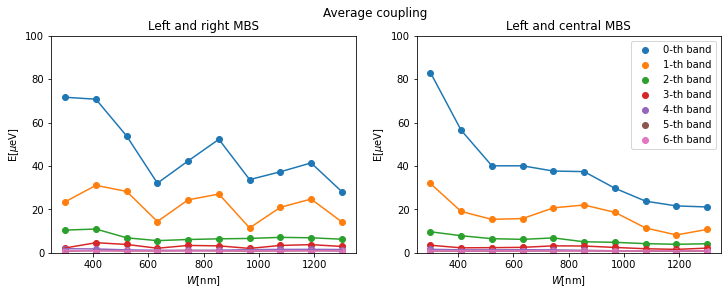

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig.suptitle(r'Average coupling')
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')

Text(0.5, 1.0, 'Left/Right and upper MBS')

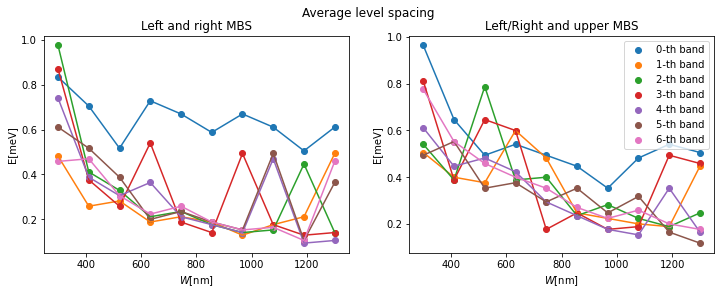

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig.suptitle(r'Average level spacing')
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')

## Width dependence wires one side

In [40]:
n_geometries = 10
widths = np.linspace(50*a, 130*a, n_geometries)

In [41]:
geometries = 1e9*widths
geometry_parameter = r'$W$[nm]'
path = '../data/rectangle_width_one_side/'

In [42]:
mus_qd = np.linspace(-0.002, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [43]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [44]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [45]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

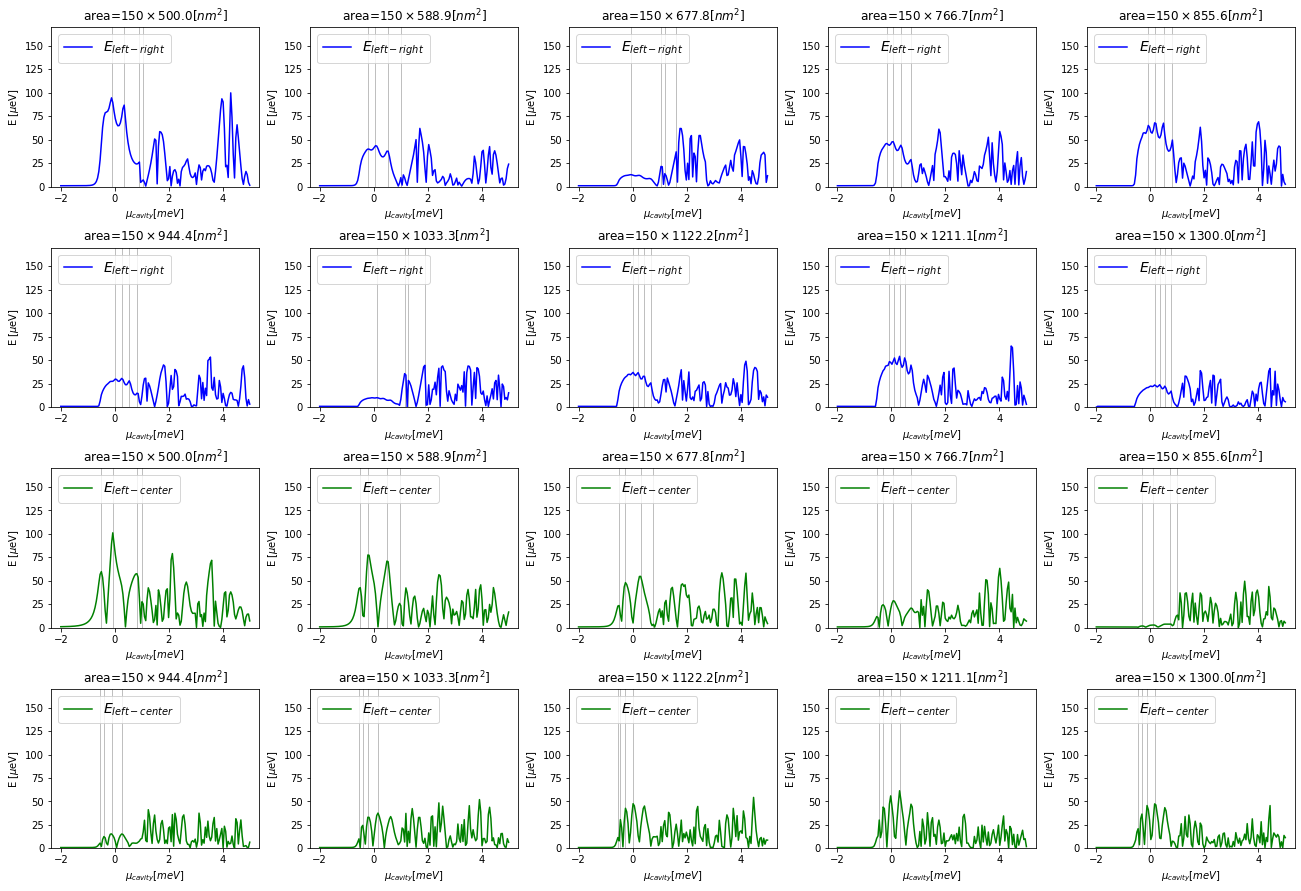

In [46]:
title = r'area=$150\times$'
units = r'[$nm^2$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

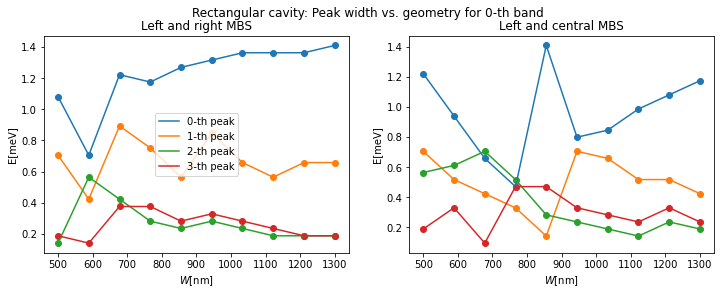

In [47]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

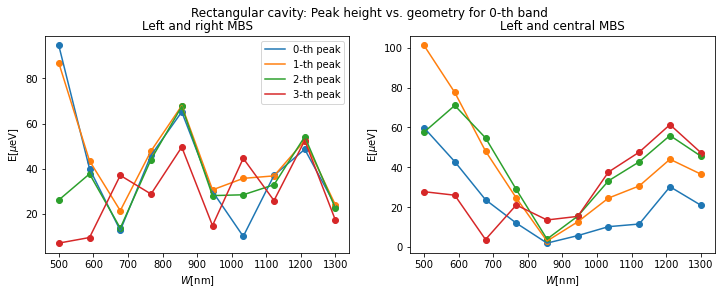

In [48]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

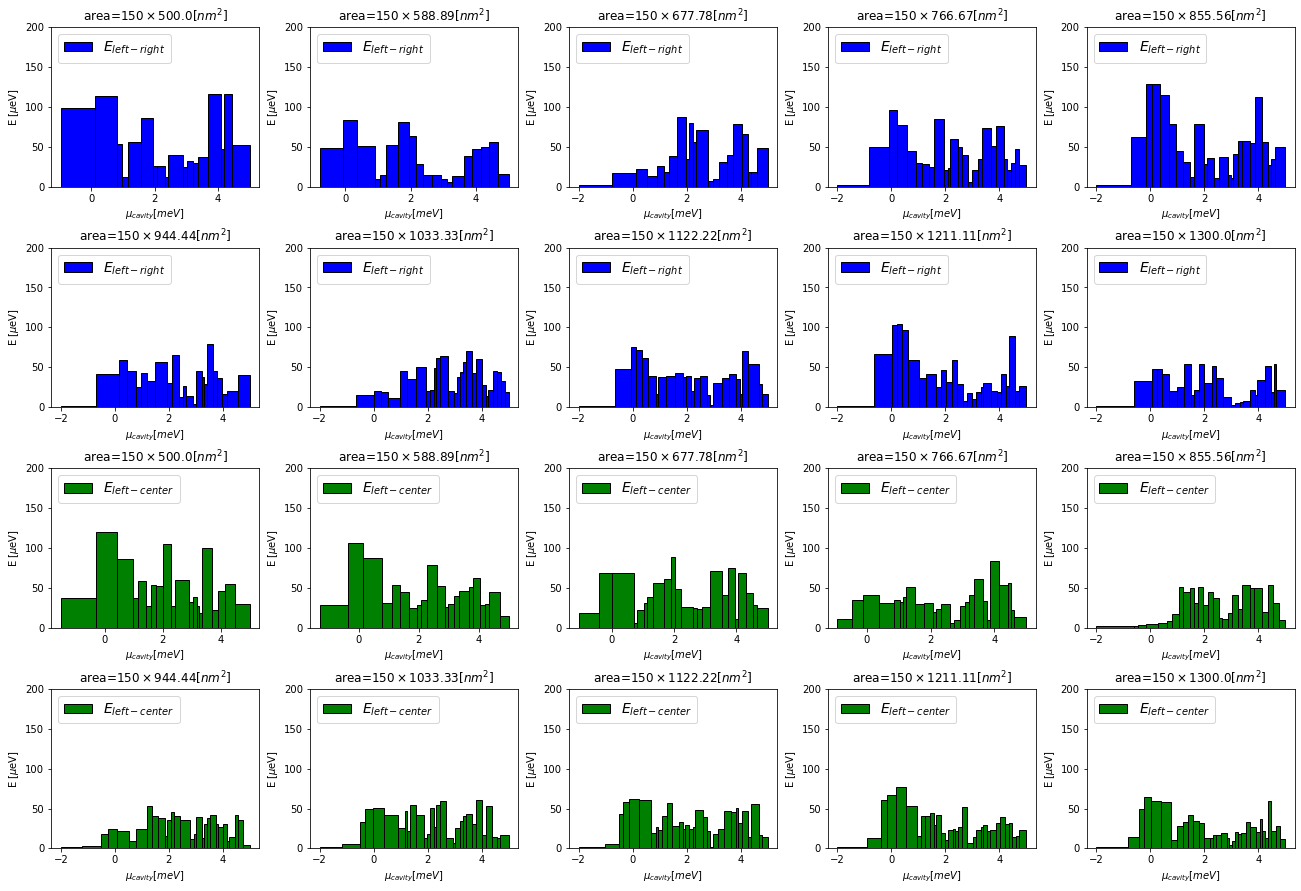

In [49]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [50]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [51]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [52]:
np.shape(bands_peaks)

(7, 10, 3, 4)

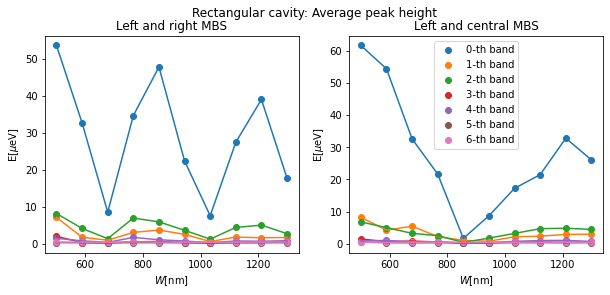

In [53]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

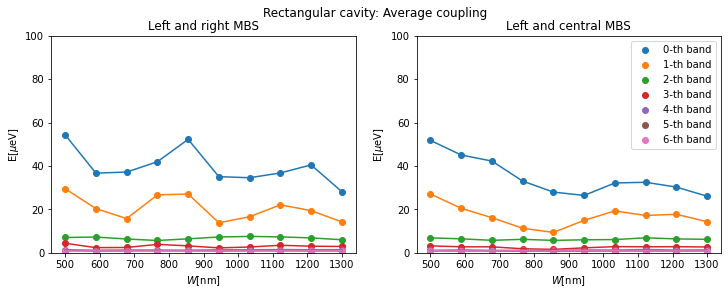

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

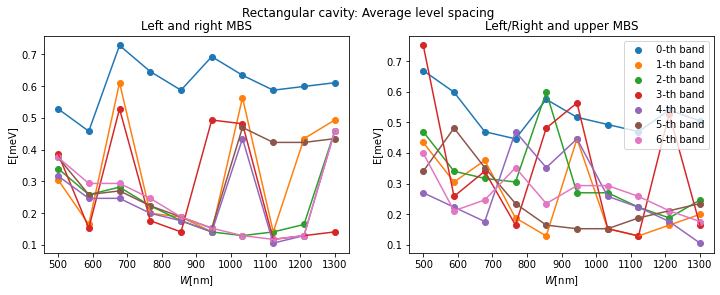

In [55]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# Circular cavity

In [38]:
exp_title = 'Circular cavity: '

## Radius dependence

In [39]:
n_geometries = 10
Rs = np.linspace(12*a, 38*a, n_geometries)

In [40]:
geometries = 1e9*Rs
geometry_parameter = r'$R$[nm]'
path = '../data/circle_radius/'

In [41]:
mus_qd = np.linspace(-0.002, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [60]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [61]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [62]:
geometry = 3
pair = 0
n_peaks = 8

In [63]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

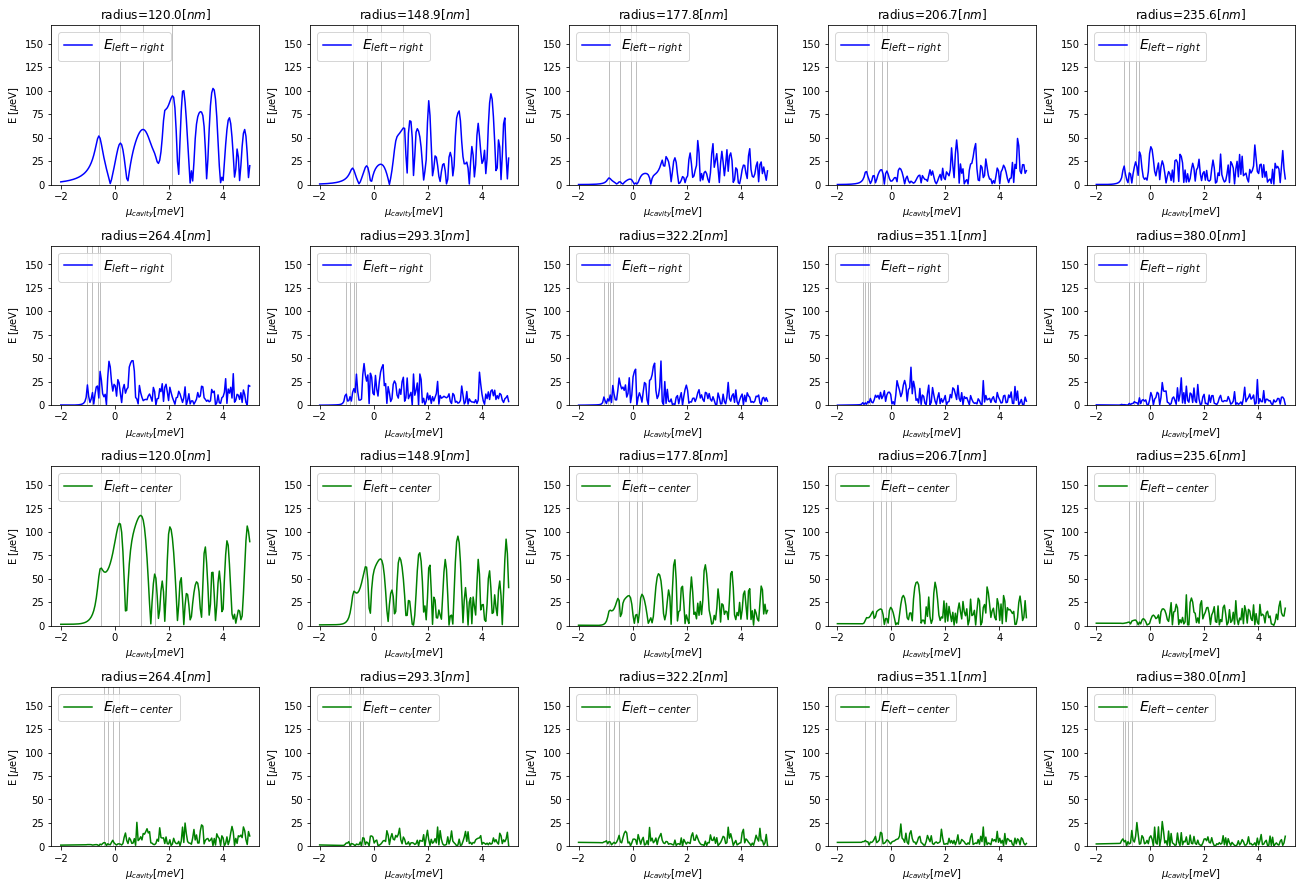

In [64]:
title = r'radius='
units = r'[$nm$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

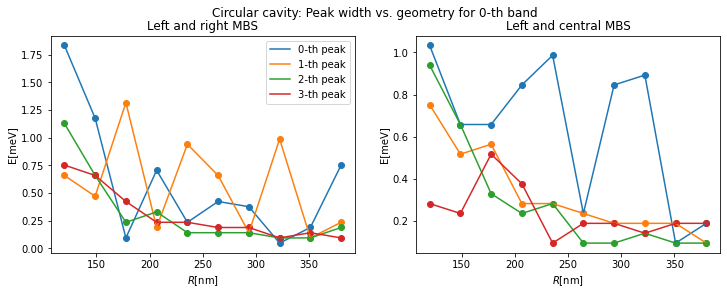

In [65]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

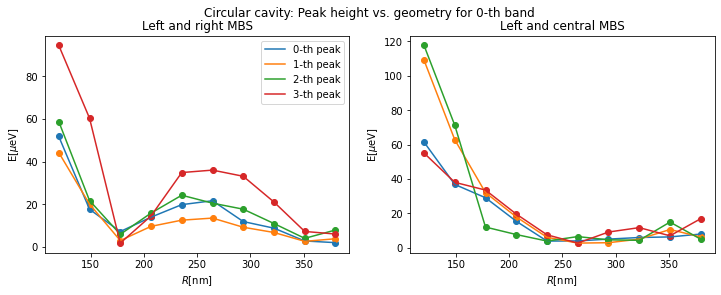

In [66]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

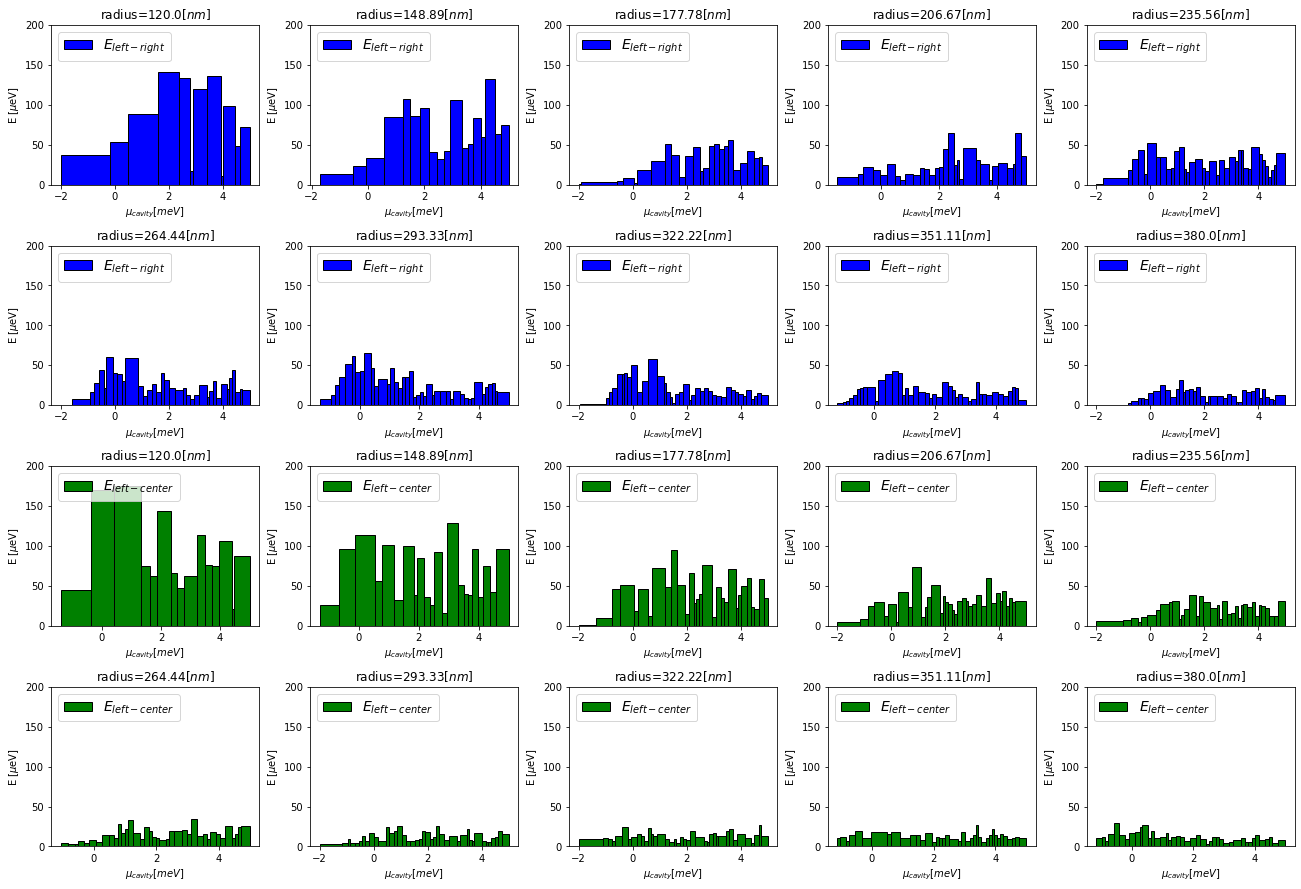

In [67]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [42]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []
    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []
        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)
        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)
    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [43]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

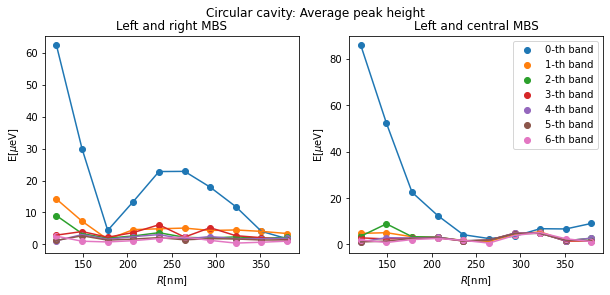

In [44]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

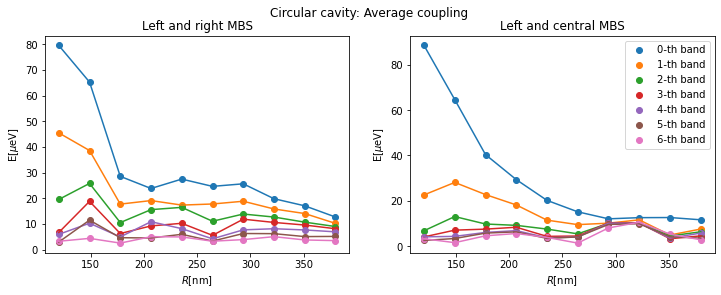

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    #ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

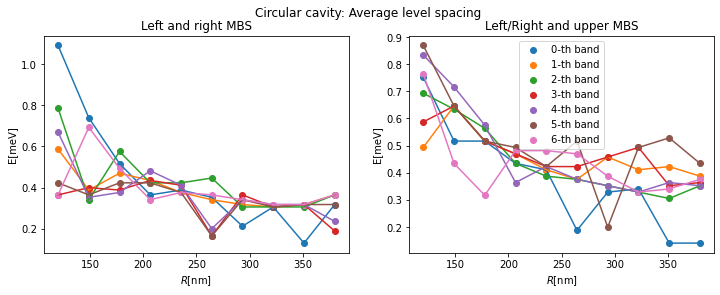

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# Half ring cavity

In [107]:
exp_title = 'Half ring cavity: '

## Radius dependence

In [108]:
geometry = {
    "l": 130*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'ring',
}

In [109]:
n_geometries = 10
rads = np.linspace([6*a,15*a], [41*a,50*a], n_geometries)

In [110]:
geometries = 1e9*rads[:, 1]
geometry_parameter = r'$R$[nm]'
path = '../data/ring_radius/'

In [111]:
mus_qd = np.linspace(-0.001, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [112]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open('../data/ring_radius/'+file, 'rb') as data:
    result = pickle.load(data)

In [113]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [114]:
geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [115]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

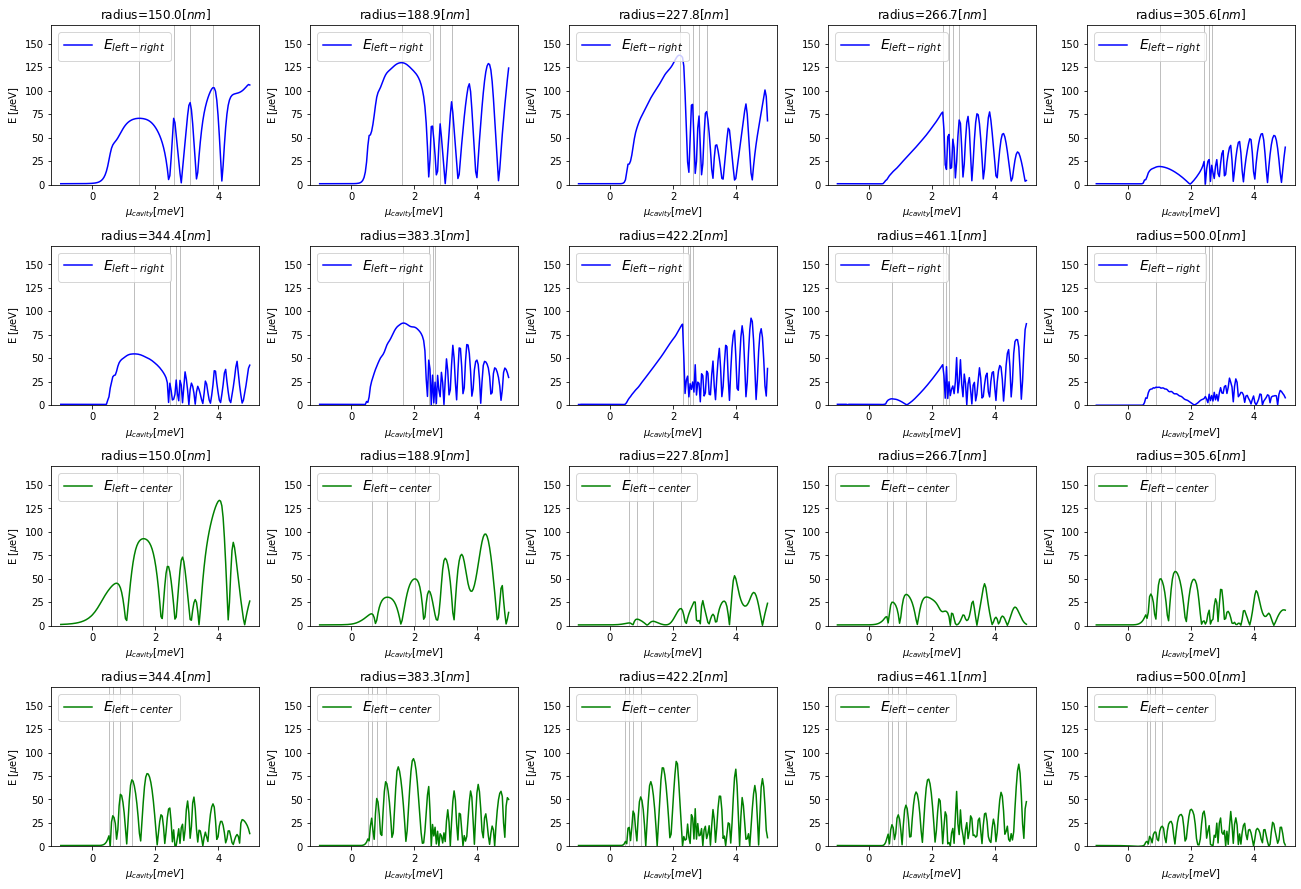

In [116]:
title = r'radius='
units = r'[$nm$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

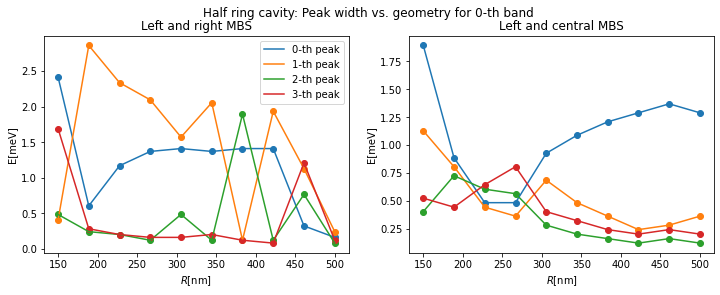

In [83]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

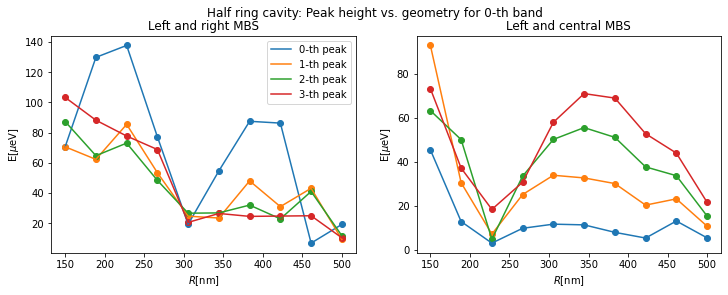

In [84]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

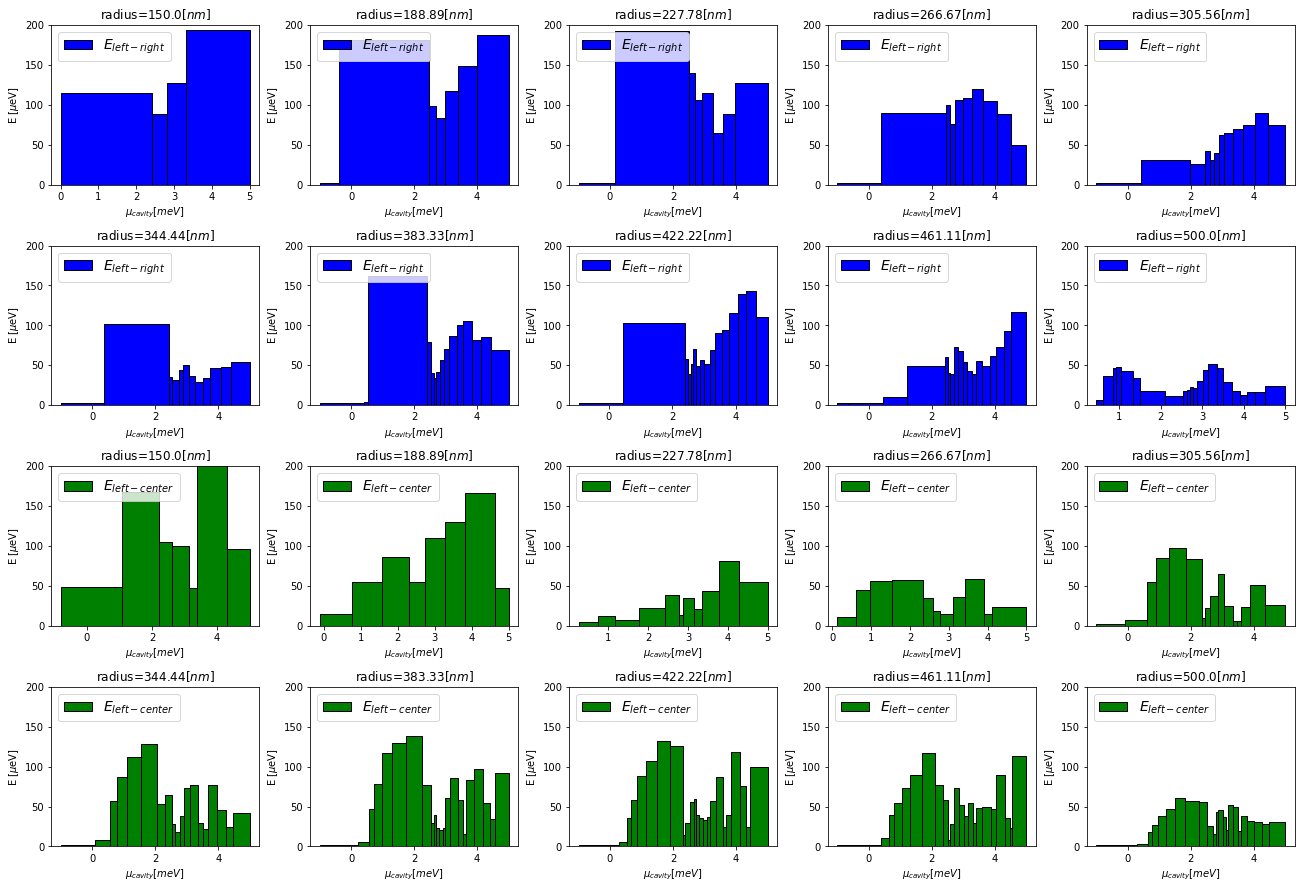

In [85]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [86]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []
    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []
        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)
        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)
    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [87]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

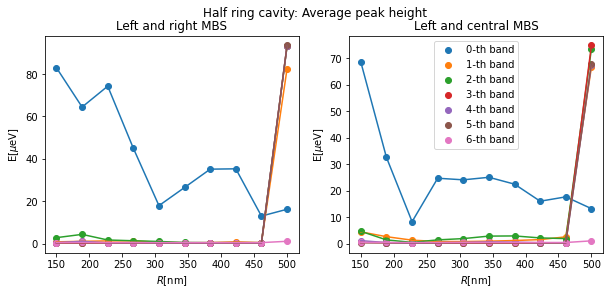

In [88]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

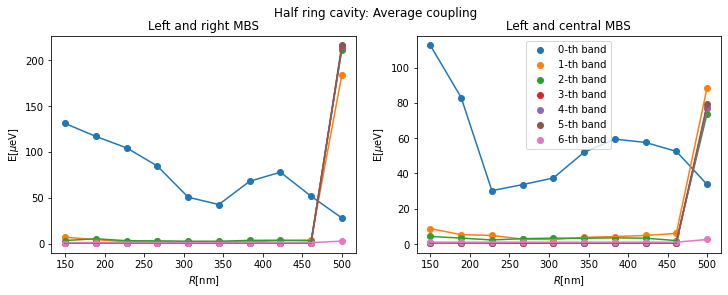

In [89]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

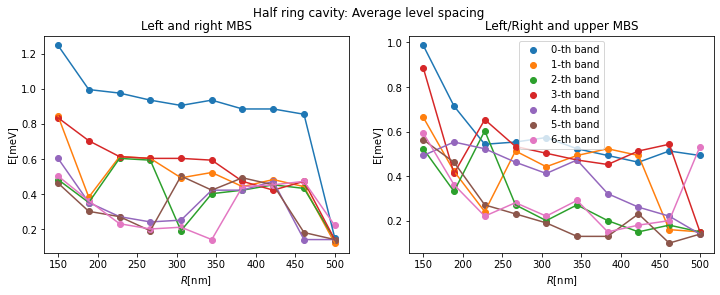

In [90]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

## Size dependence

In [91]:
n_geometries = 10
rads = np.linspace([11*a,40*a], [31*a,40*a], n_geometries)

In [92]:
geometries = 1e9*(rads[:, 1] - rads[:, 0])
geometry_parameter = r'$width$[nm]'
path = '../data/ring_size/'

In [93]:
mus_qd = np.linspace(-0.001, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [94]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [95]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [96]:
geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [97]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

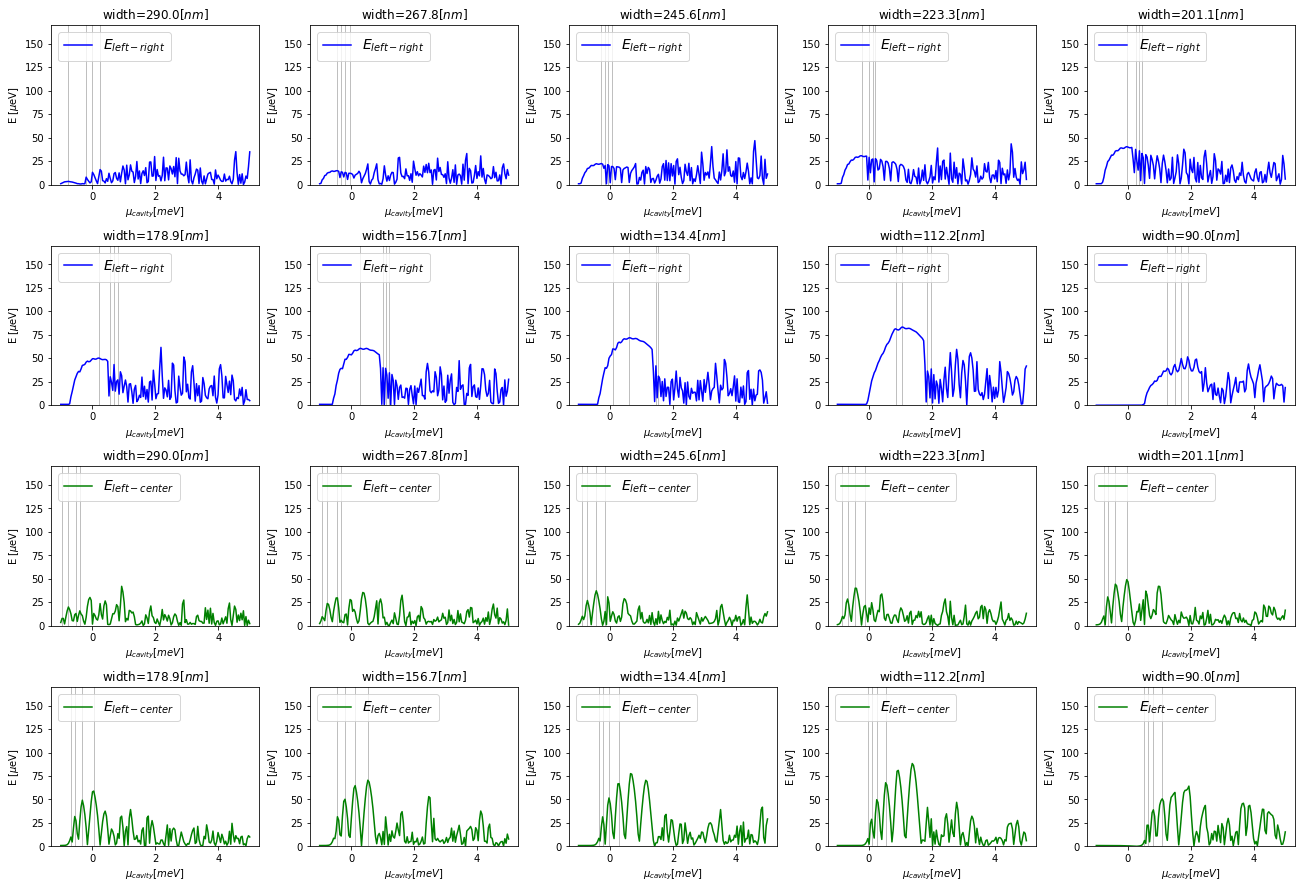

In [98]:
title = r'width='
units = r'[$nm$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

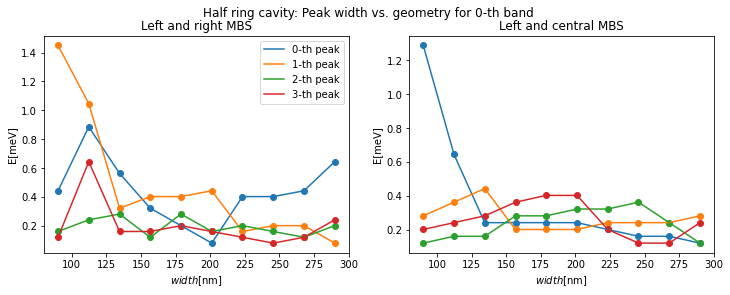

In [99]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

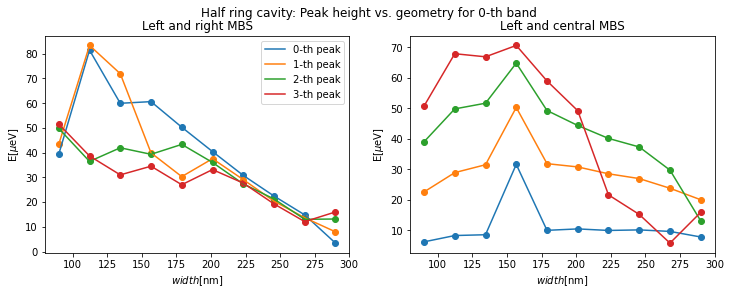

In [100]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

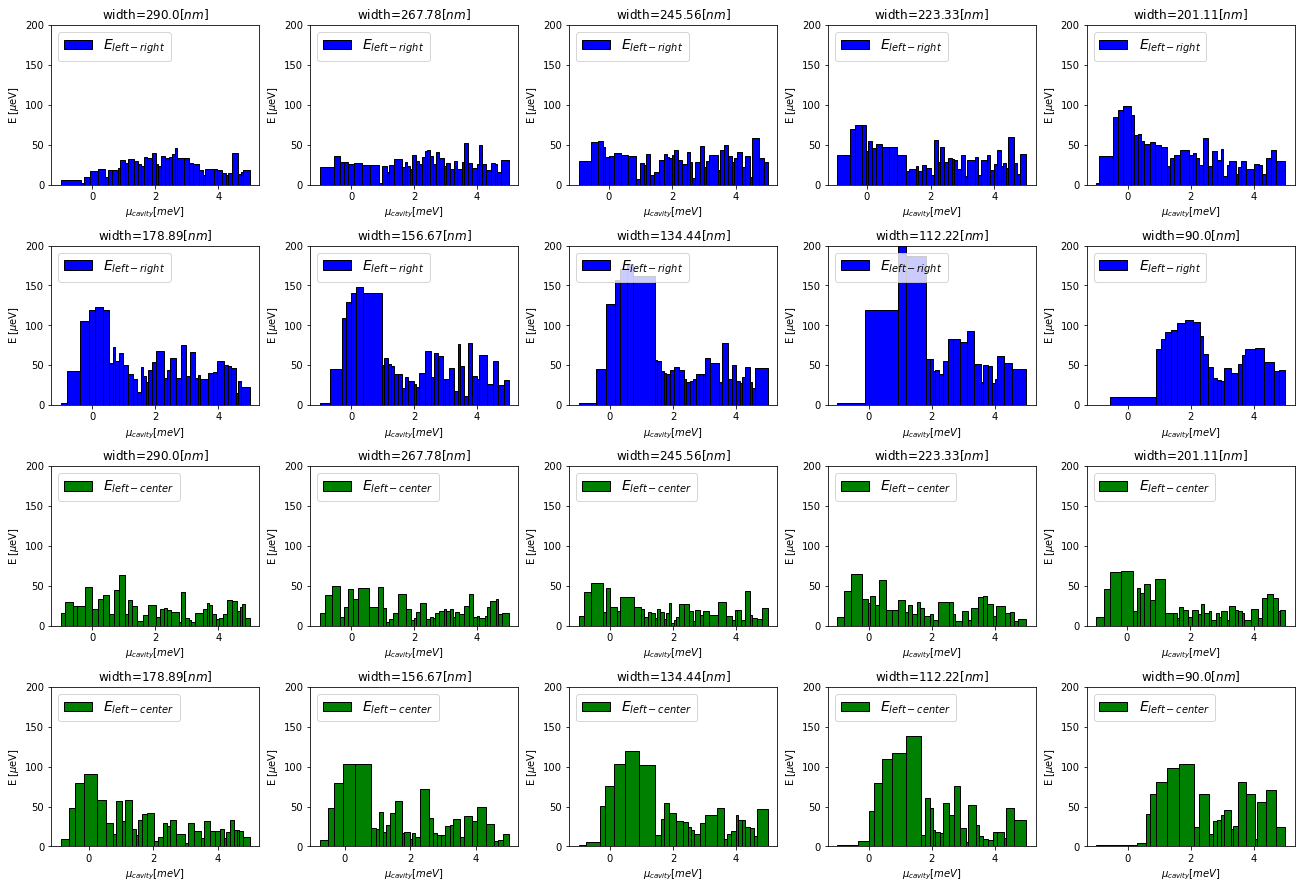

In [101]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [102]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []
    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []
        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)
        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)
    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [103]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

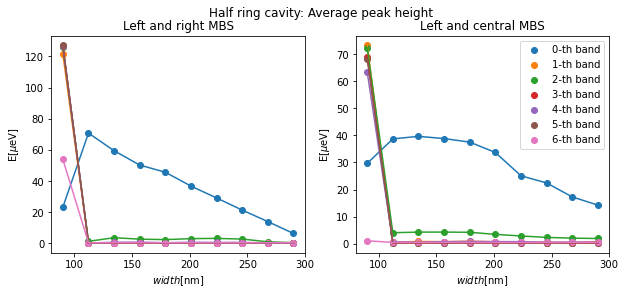

In [104]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

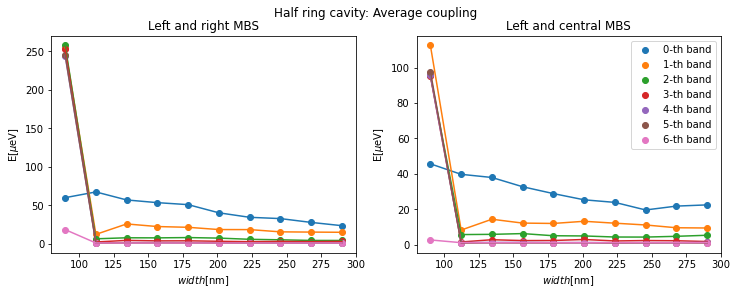

In [105]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

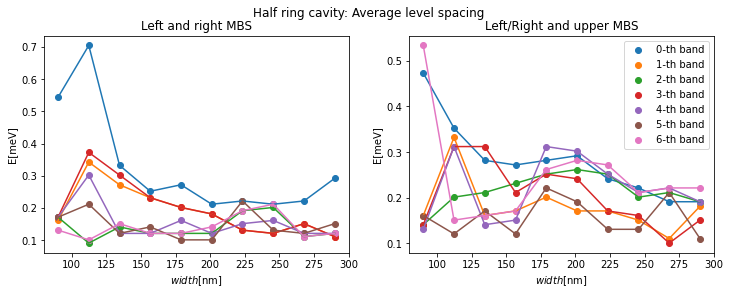

In [106]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# V-shaped cavity

In [4]:
exp_title = 'V-shaped cavity: '

## Angle dependence

In [5]:
n_geometries = 10
angles = np.linspace(0.15, 0.45, n_geometries)*np.pi

In [6]:
geometries = angles
geometry_parameter = r'$\theta$[$\pi$]'
path = '../data/v_angle/'

In [7]:
mus_qd = np.linspace(-0.001, 0.005, 200)
n_peaks = 4
prominence = 1e-6

## Analyze results: single band

In [8]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [9]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [10]:
geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [11]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

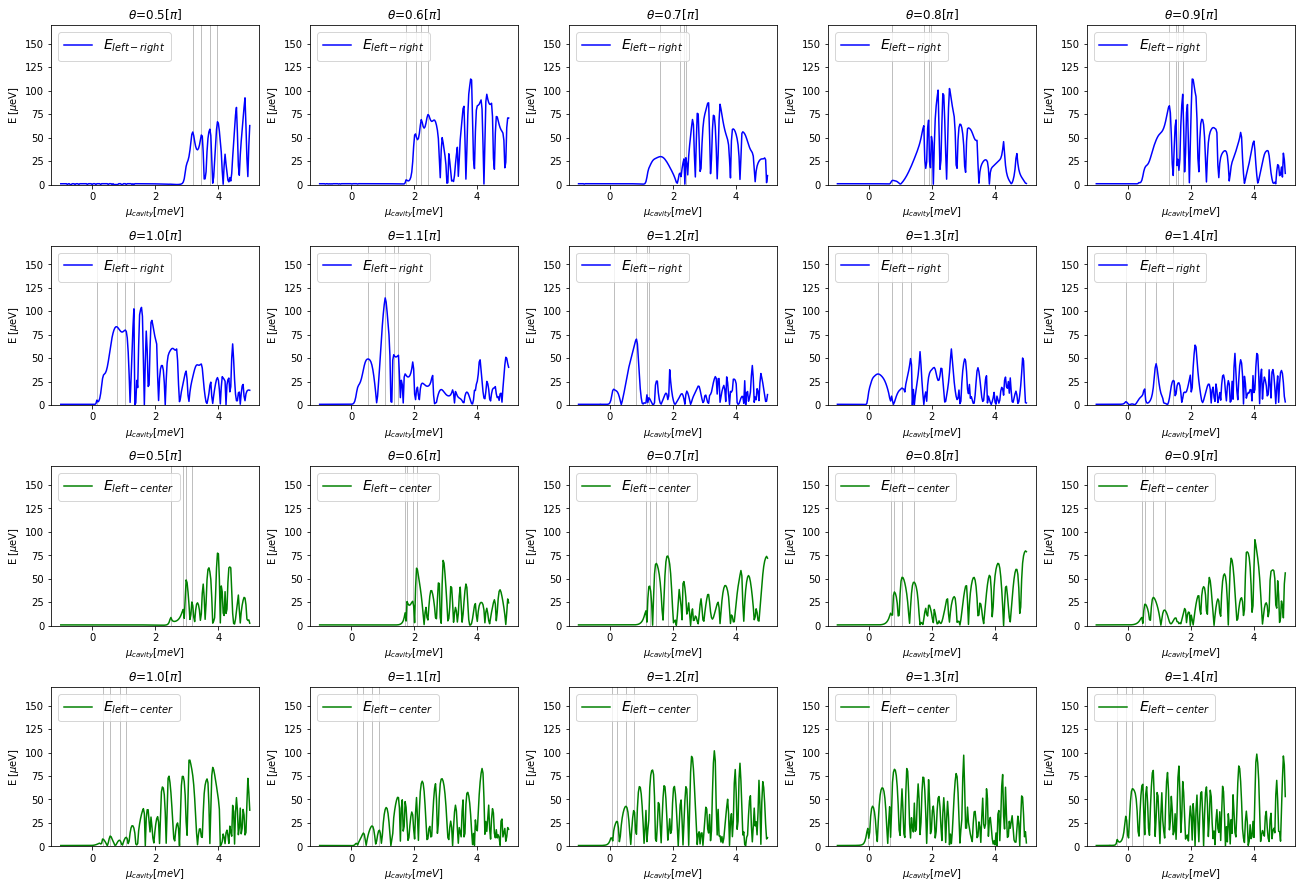

In [12]:
title = r'$\theta$='
units = r'[$\pi$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

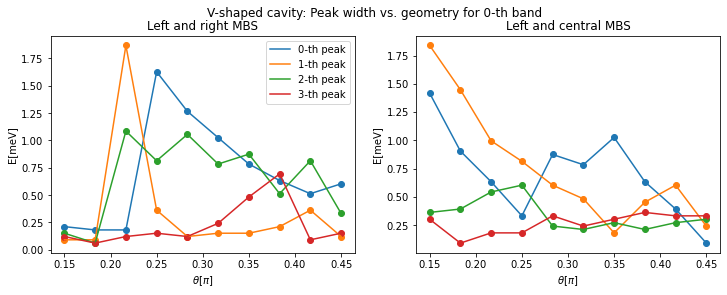

In [116]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

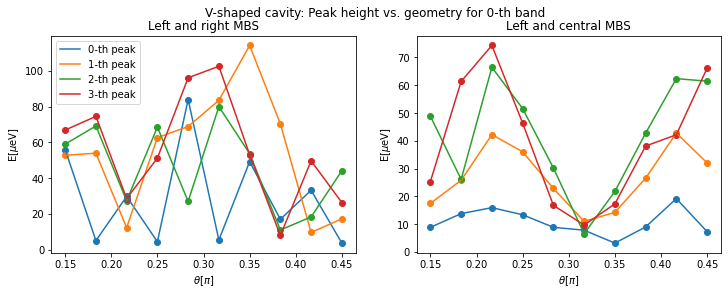

In [117]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

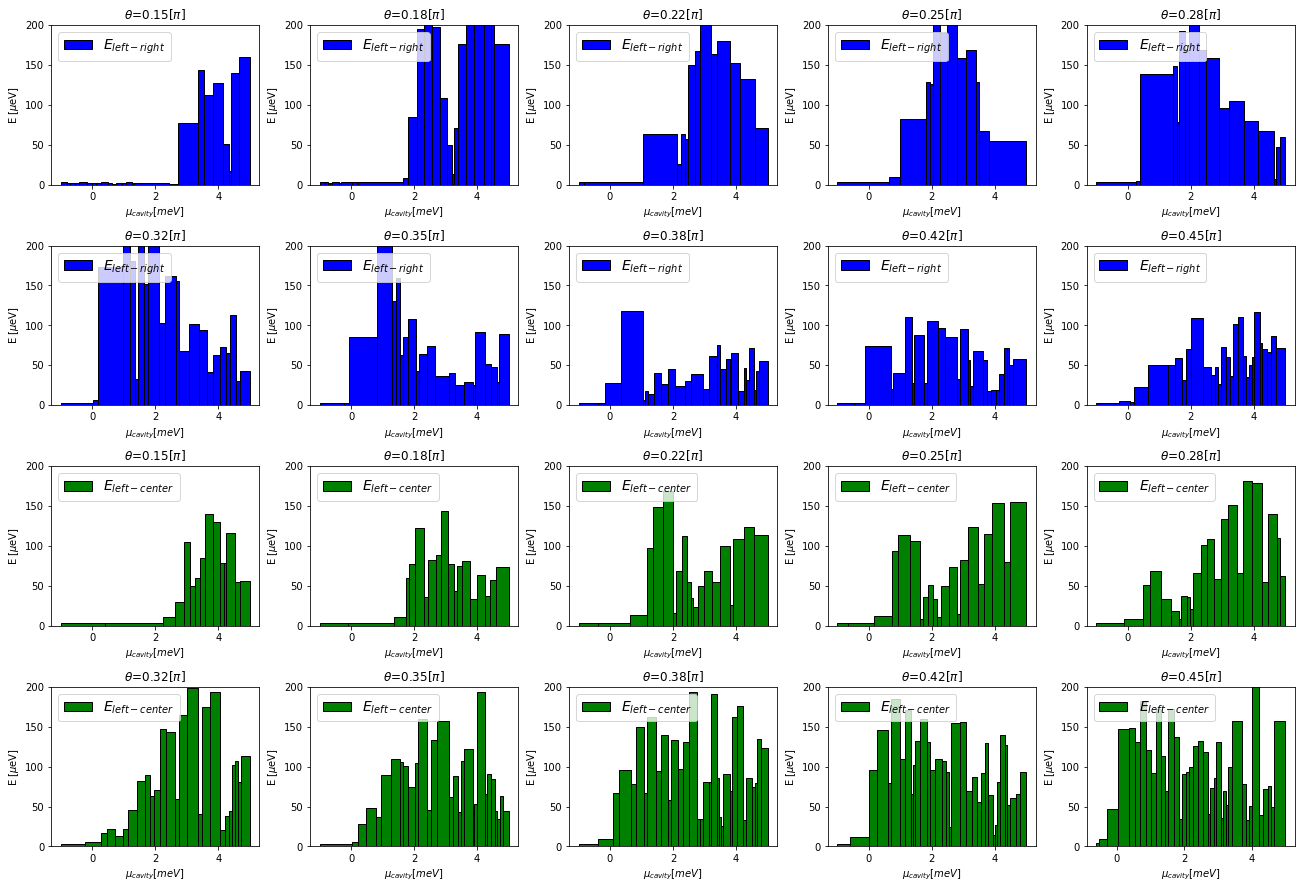

In [118]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

## Analyze results: all bands

In [119]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []
    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []
        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)
        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)
    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [120]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

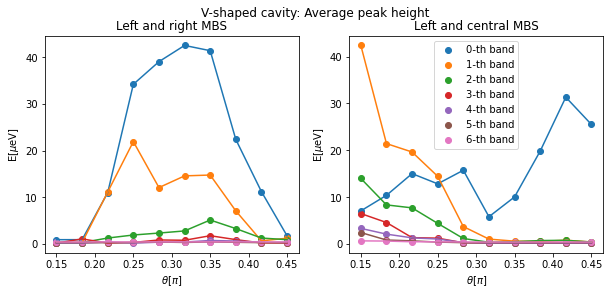

In [121]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

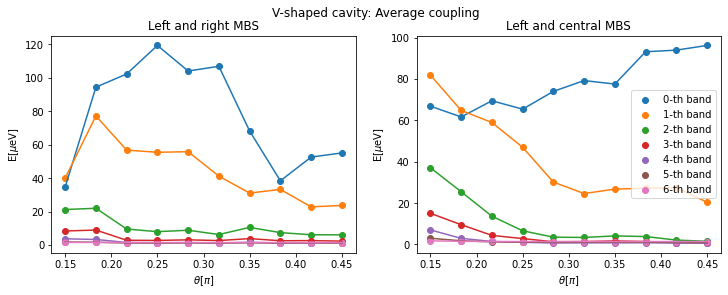

In [122]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

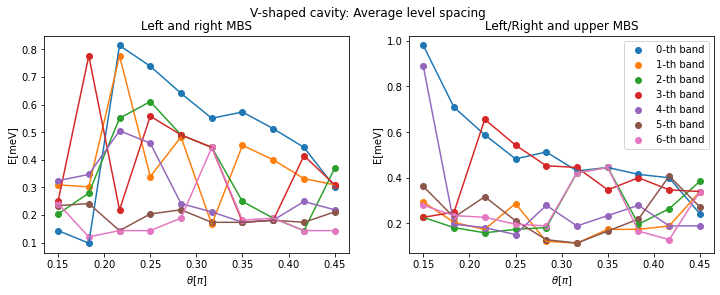

In [123]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# Triangular cavity with wires at both sides

In [39]:
exp_title = 'Triangle both sides cavity: '

## Angular dependence

In [41]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [42]:
geometries = angles
geometry_parameter = r'$\theta[\pi]$'
path = '../data/triangle_angles_two_sides/'

In [43]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
n_peaks = 4
prominence = 4e-6

### Analyze results: single band

In [121]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [129]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry, prominence=prominence))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [130]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

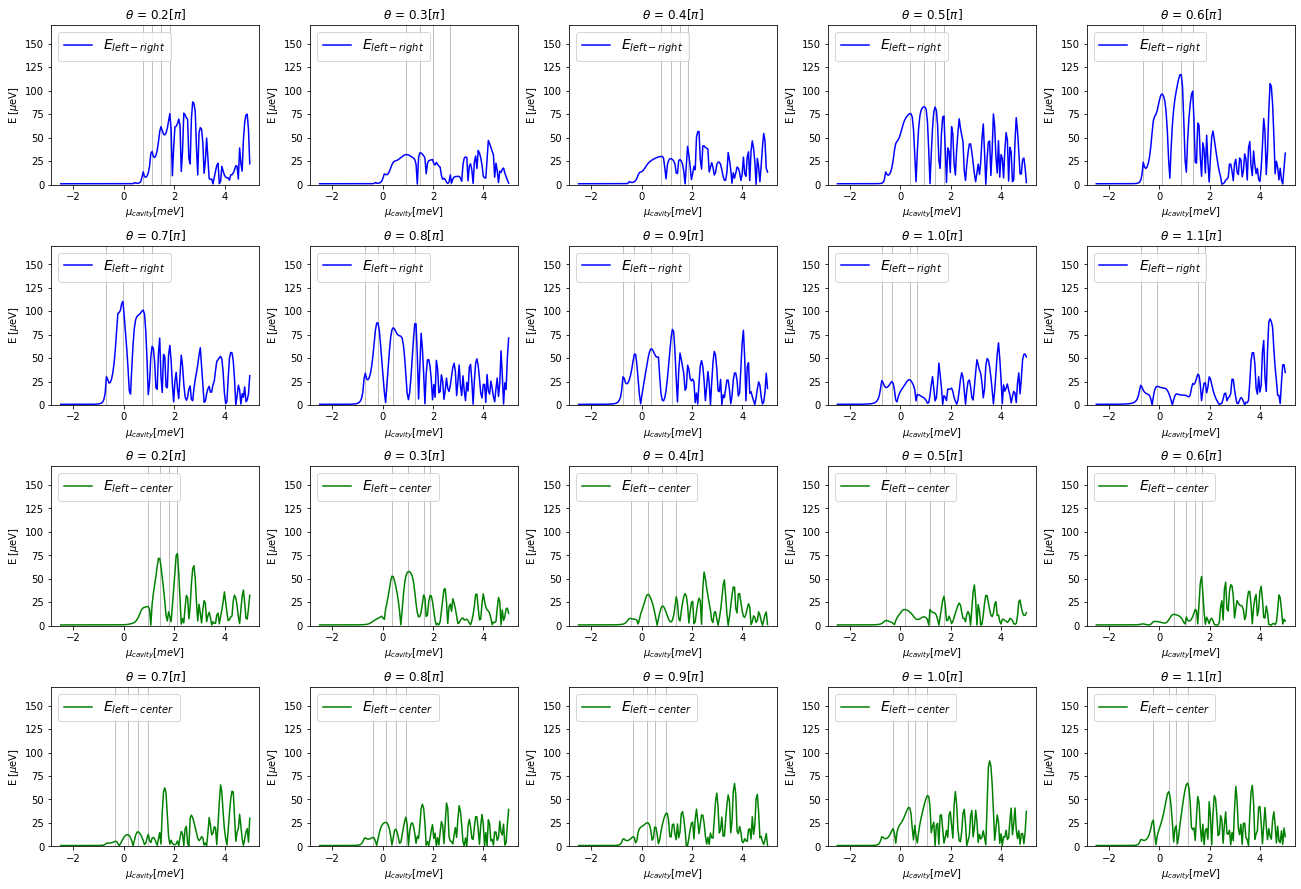

In [131]:
title = r'$\theta$ = '
units = r'[$\pi$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

In [132]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

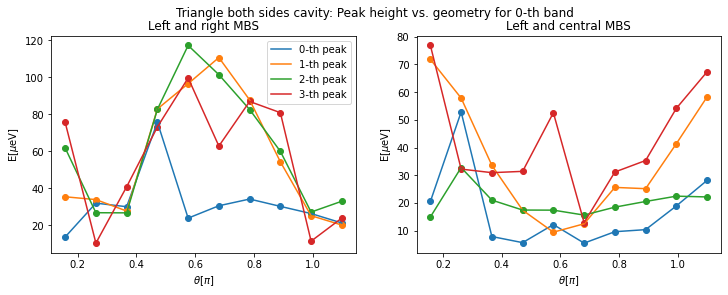

In [133]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

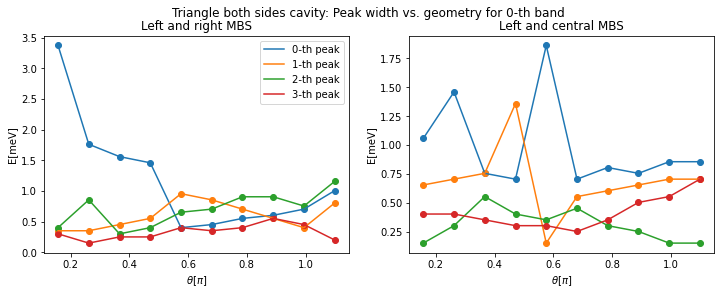

In [134]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

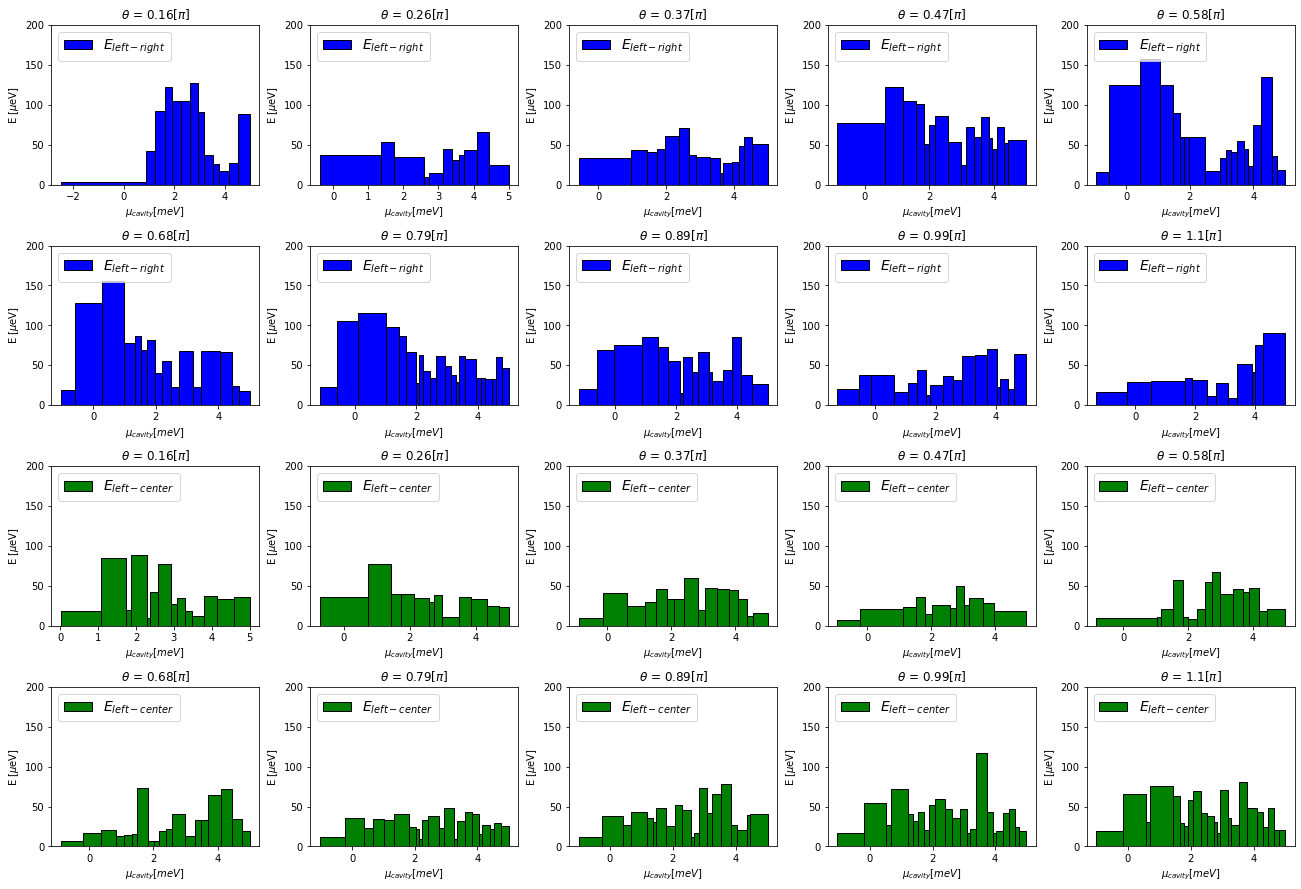

In [135]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [44]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [45]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [46]:
np.shape(bands_peaks)

(7, 10, 3, 4)

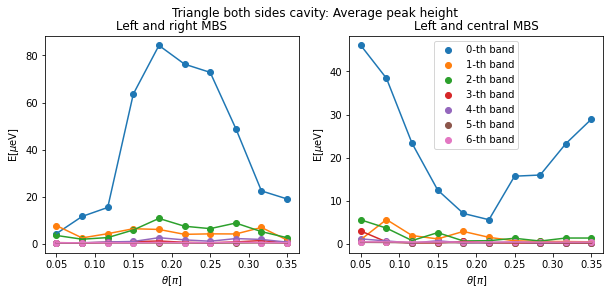

In [47]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

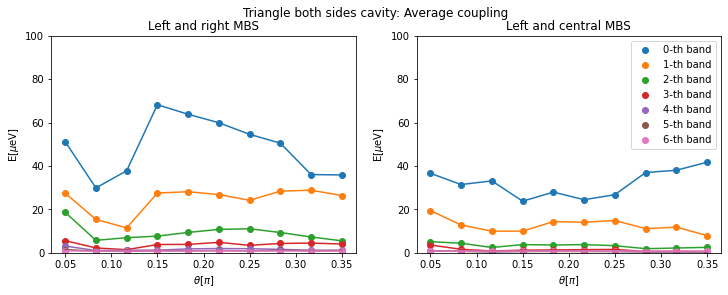

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

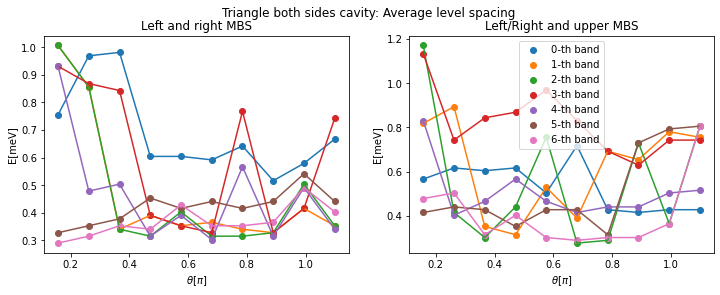

In [127]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

## Size dependence

In [31]:
n_geometries = 10
areas = np.linspace(500, 2500, n_geometries)

In [32]:
geometries = 10*areas/2
geometry_parameter = r'area$[nm^2]$'
path = '../data/triangle_size_one_side/'

In [33]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [145]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [146]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry, prominence=prominence))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [147]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

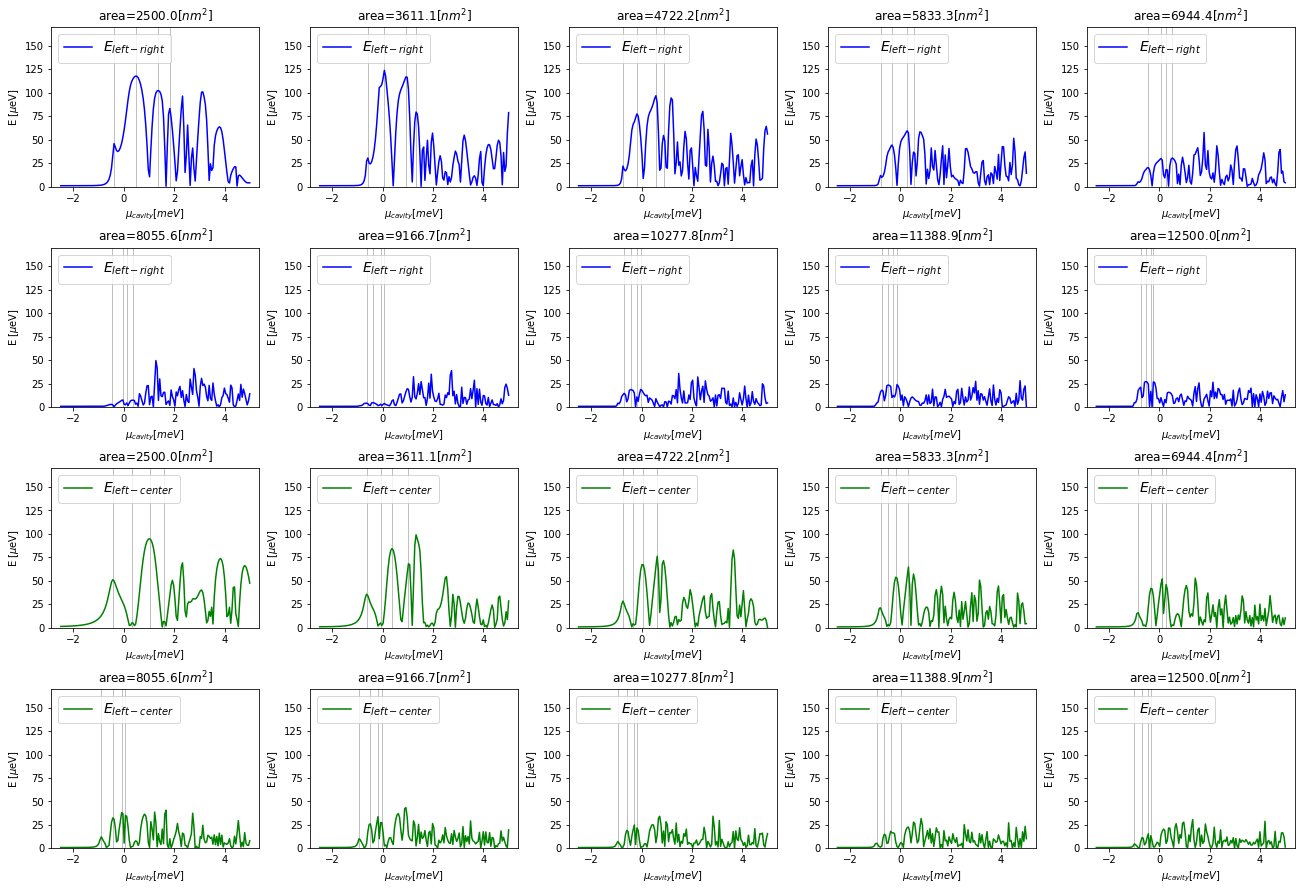

In [148]:
title = r'area='
units = r'[$nm^2$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

In [149]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

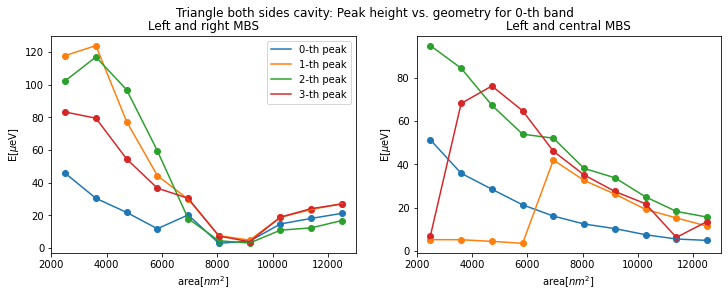

In [150]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

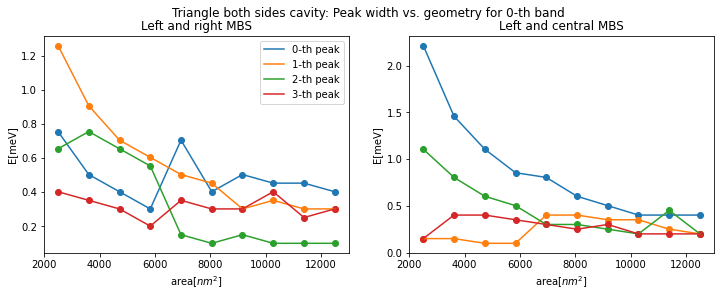

In [151]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

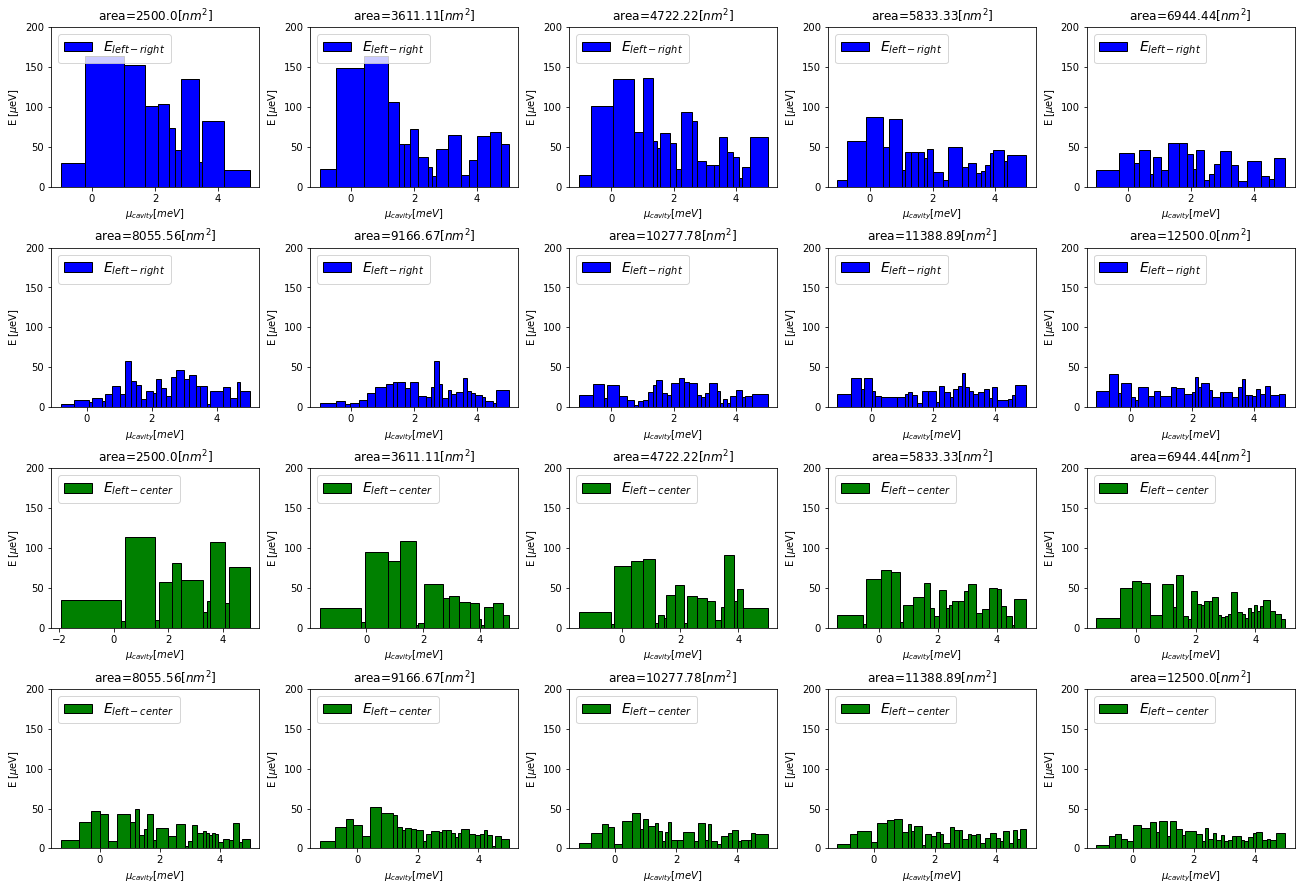

In [152]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [34]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [35]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [36]:
np.shape(bands_peaks)

(7, 10, 3, 4)

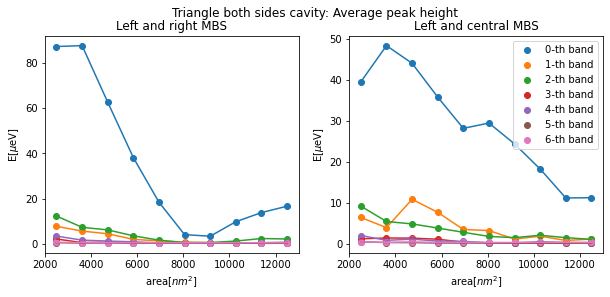

In [37]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

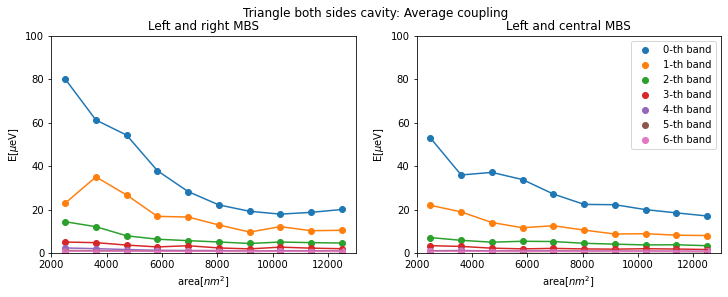

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

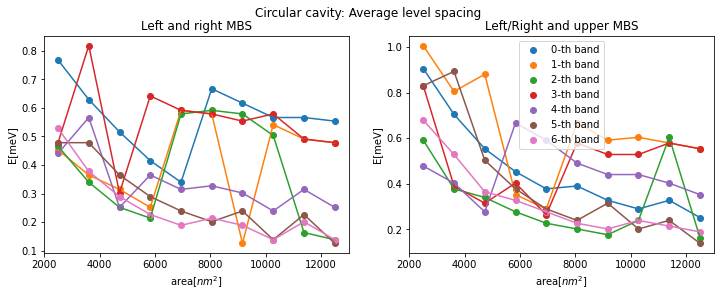

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# Triangular cavity with wires at one side

In [49]:
exp_title = 'Triangle one side cavity: '

## Angular dependence

In [50]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [51]:
geometries = angles
geometry_parameter = r'$\theta[\pi]$'
path = '../data/triangle_angles_one_side/'

In [52]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
n_peaks = 4
prominence = 4e-6

### Analyze results: single band

In [163]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [164]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry, prominence=prominence))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [165]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

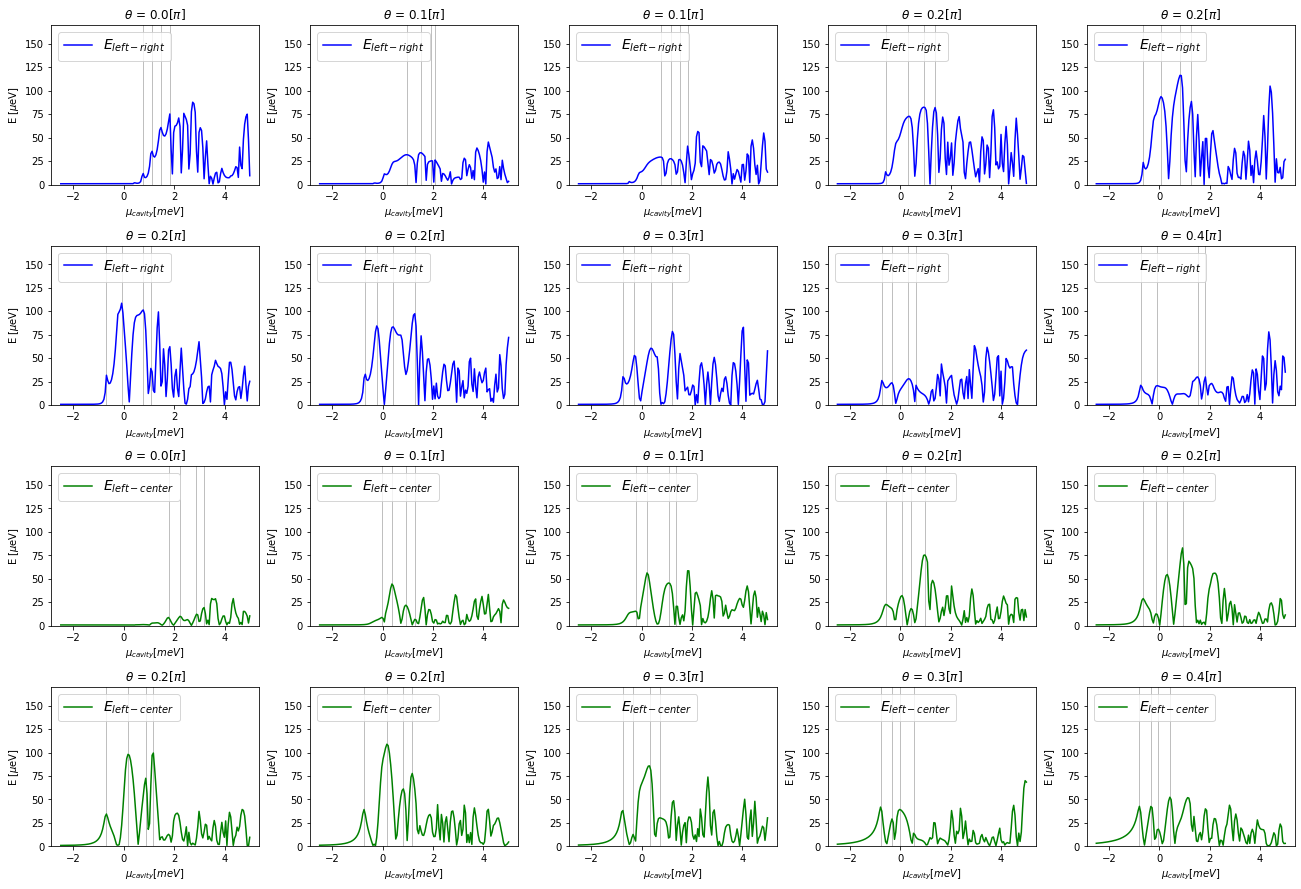

In [166]:
title = r'$\theta$ = '
units = r'[$\pi$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

In [167]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

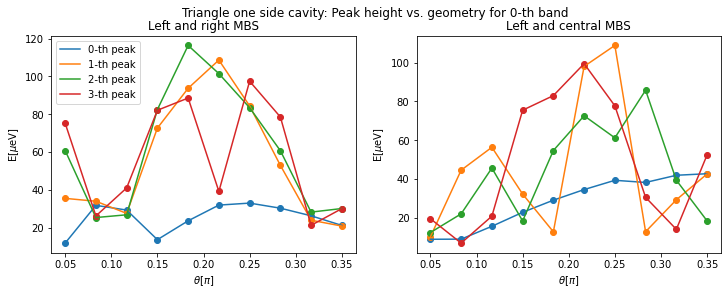

In [168]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

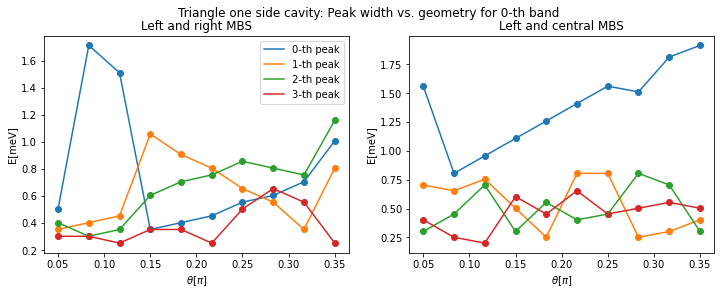

In [169]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

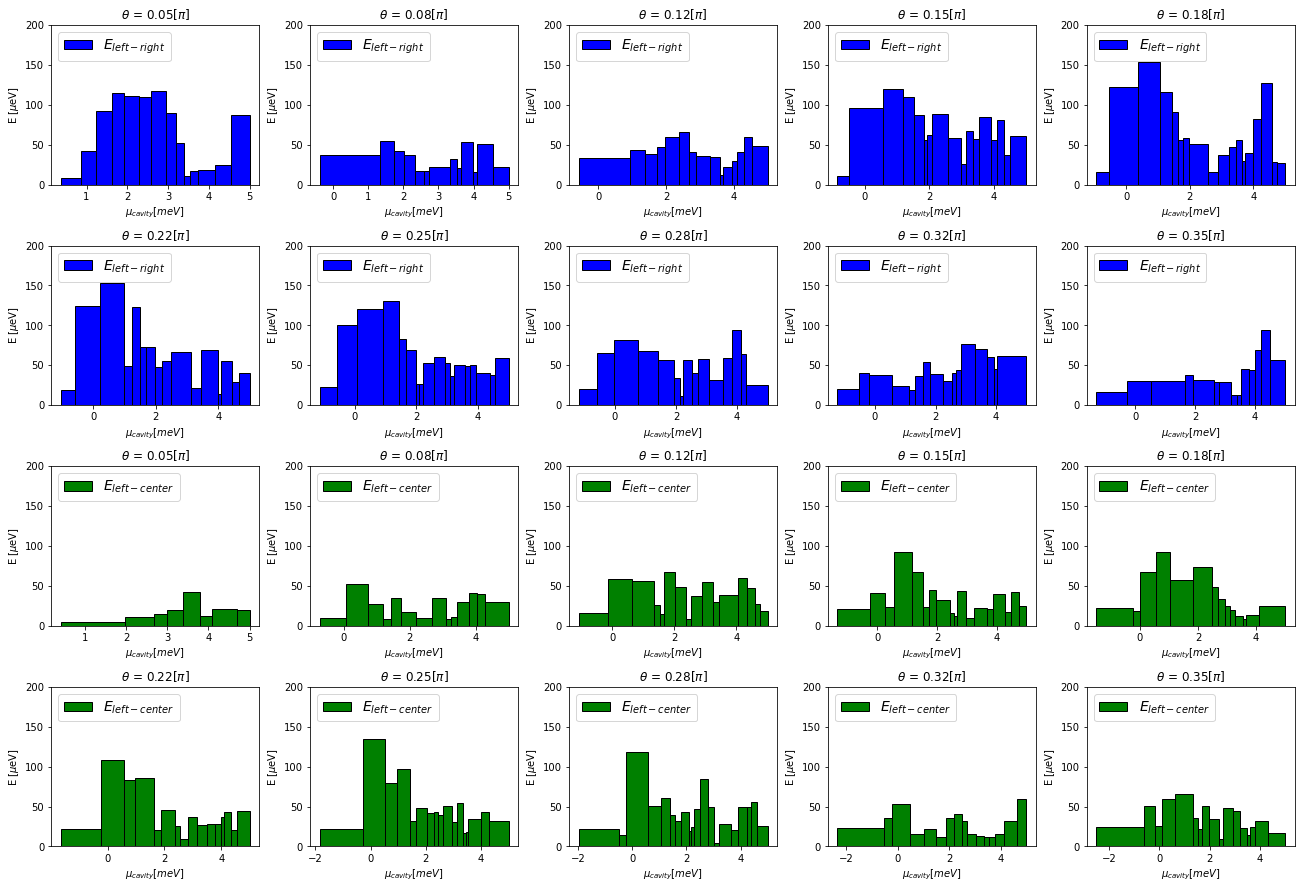

In [170]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [53]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [54]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [55]:
np.shape(bands_peaks)

(7, 10, 3, 4)

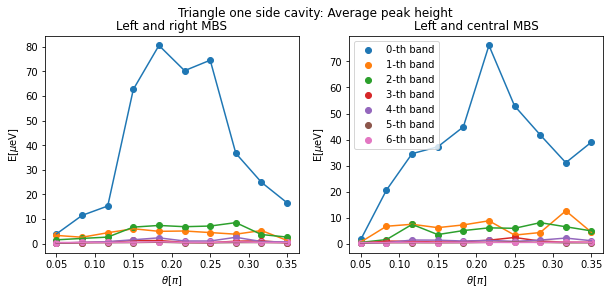

In [56]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

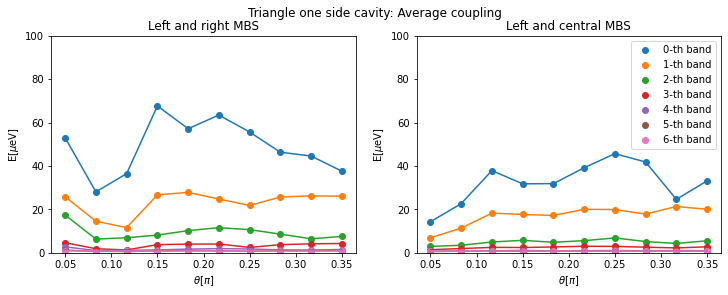

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

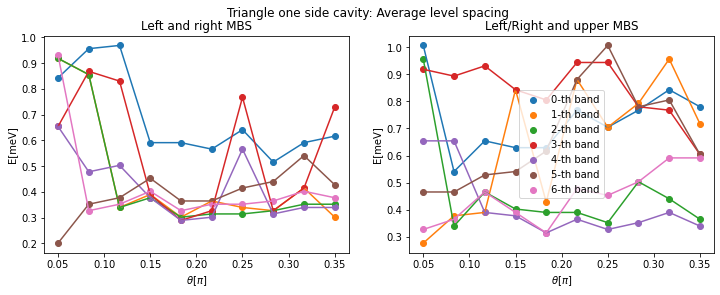

In [176]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# Inverse triangular cavity with wires at both sides

In [177]:
exp_title = 'Inverse triangle both sides cavity: '

## Angular dependence

In [178]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [179]:
geometries = angles
geometry_parameter = r'$\theta[\pi]$'
path = '../data/inverted_triangle_angle_two_sides/'

In [180]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [181]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [182]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry, prominence=prominence))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [183]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

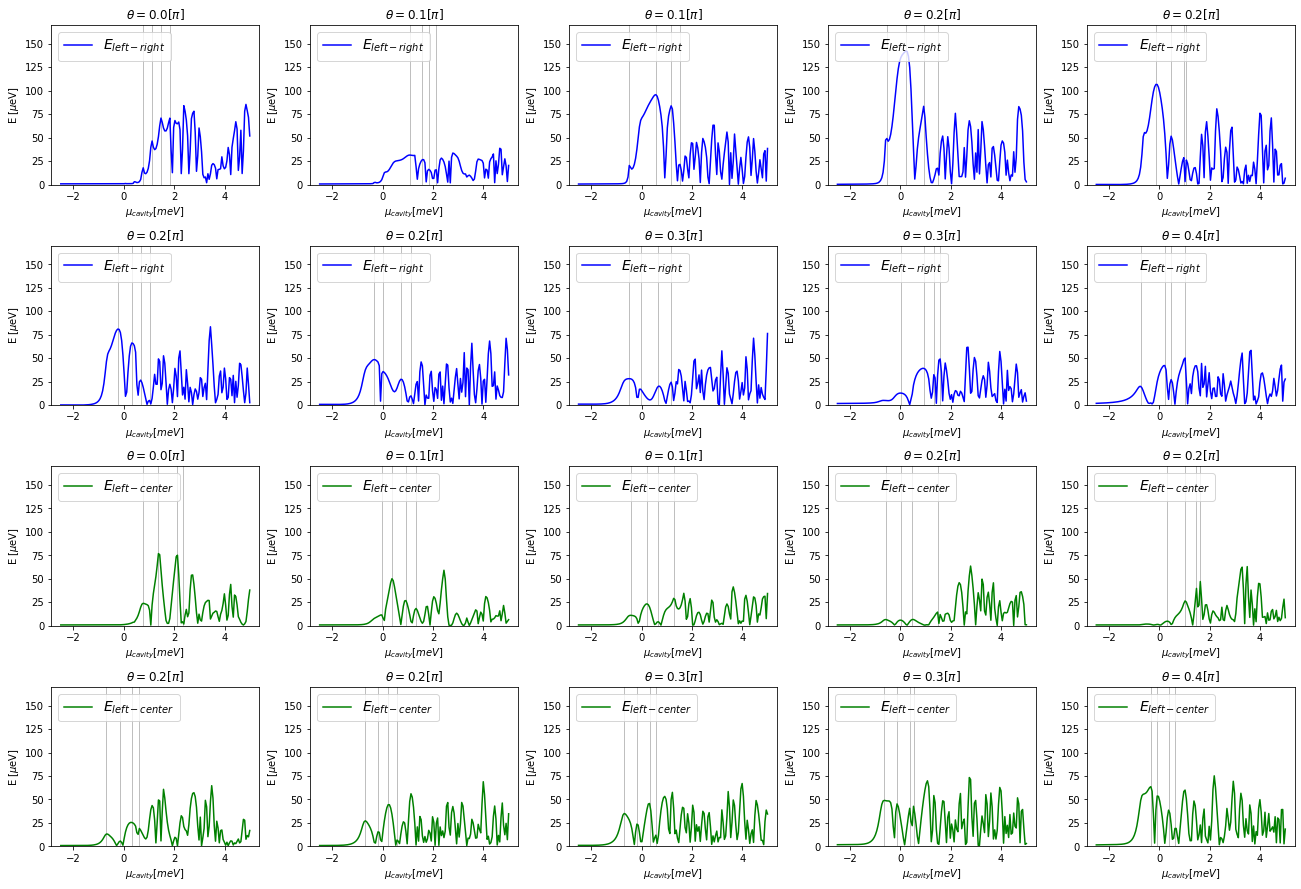

In [184]:
title = r'$\theta = $'
units = r'[$\pi$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

In [185]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

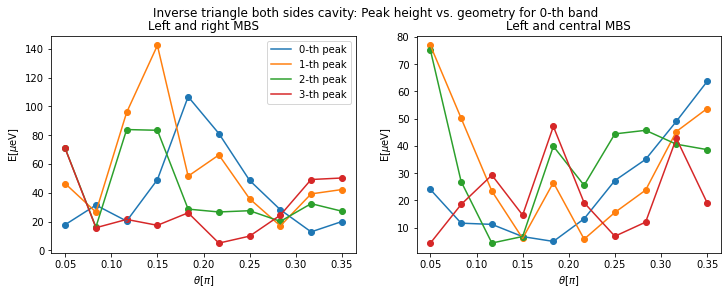

In [186]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

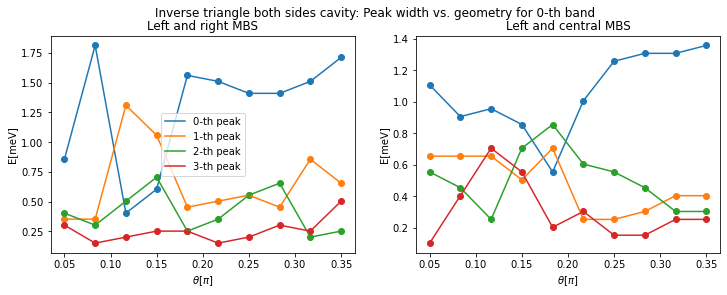

In [187]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

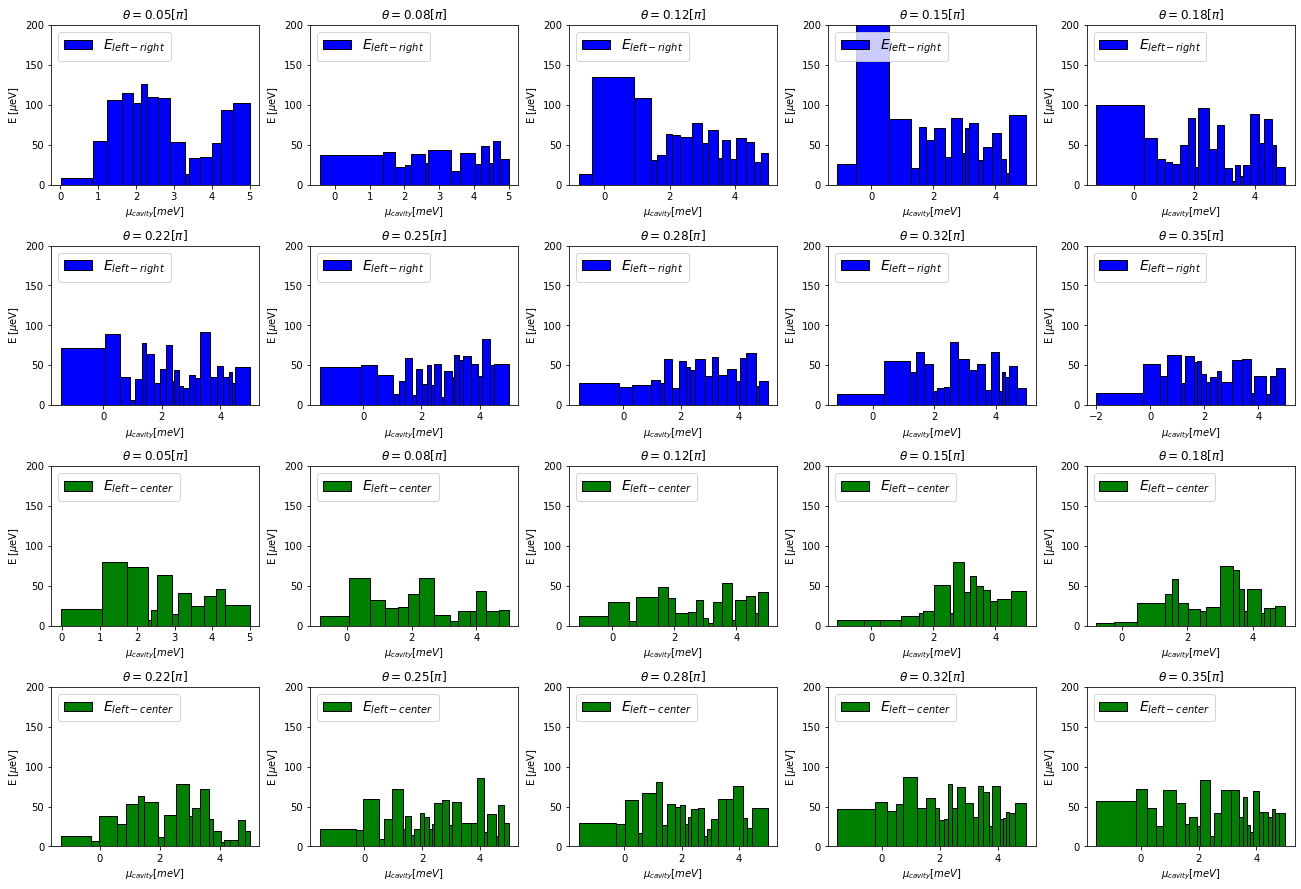

In [188]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [189]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [190]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [191]:
np.shape(bands_peaks)

(7, 10, 3, 4)

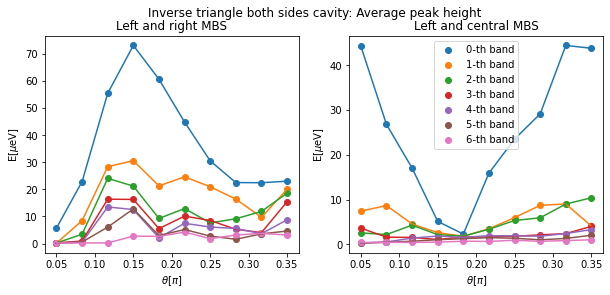

In [192]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

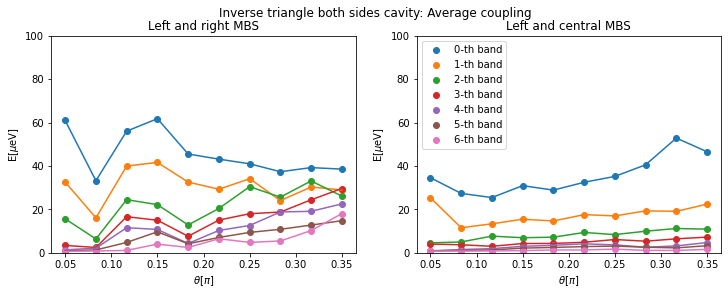

In [193]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

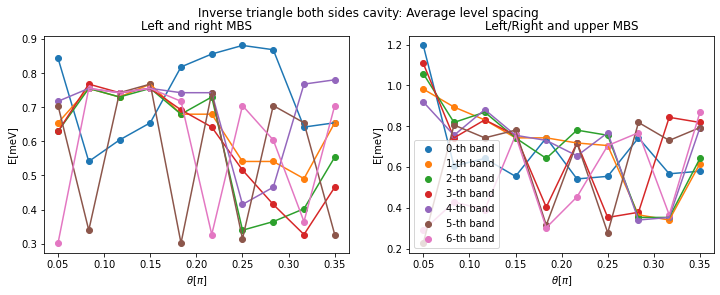

In [194]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

# Inverse triangular cavity with wires at one sides

In [195]:
exp_title = 'Inverse triangle one side cavity: '

## Angular dependence

In [196]:
n_geometries = 10
angles = np.linspace(0.05, 0.35, n_geometries)

In [197]:
geometries = angles
geometry_parameter = r'$\theta[\pi]$'
path = '../data/inverted_triangle_angles_one_side/'

In [198]:
mus_qd = np.linspace(-0.0025, 0.005, 150)
n_peaks = 4
prominence = 1e-6

### Analyze results: single band

In [199]:
index = 0
# open raw simulation result
file = 'band_'+str(index)+'th.pickle'
with open(path+file, 'rb') as data:
    result = pickle.load(data)

In [200]:
geometries_couplings = []
geometries_peaks = []
geometries_averages = []

data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)
for geometry in data_geometries:
    couplings, wfs, peaks = tl.coupling_data(data=geometry, sign=1, prominence=prominence, n_peaks=n_peaks)
    geometries_couplings.append(couplings)
    geometries_peaks.append(peaks)
    geometries_averages.append(tl.average_energy_levels(mus=mus_qd, result=geometry, prominence=prominence))

geometries_couplings = np.array(geometries_couplings)
geometries_peaks = np.array(geometries_peaks)
geometries_averages = np.array(geometries_averages)

In [201]:
geometry = 0
pair = 0
geometries_widths = geometries_averages[:, :, 2]
couplings = 1e6*geometries_couplings[geometry][pair]
average_data = geometries_averages[geometry][pair]
peaks = geometries_peaks[geometry][pair]
mus_qd_units = 1e3*mus_qd

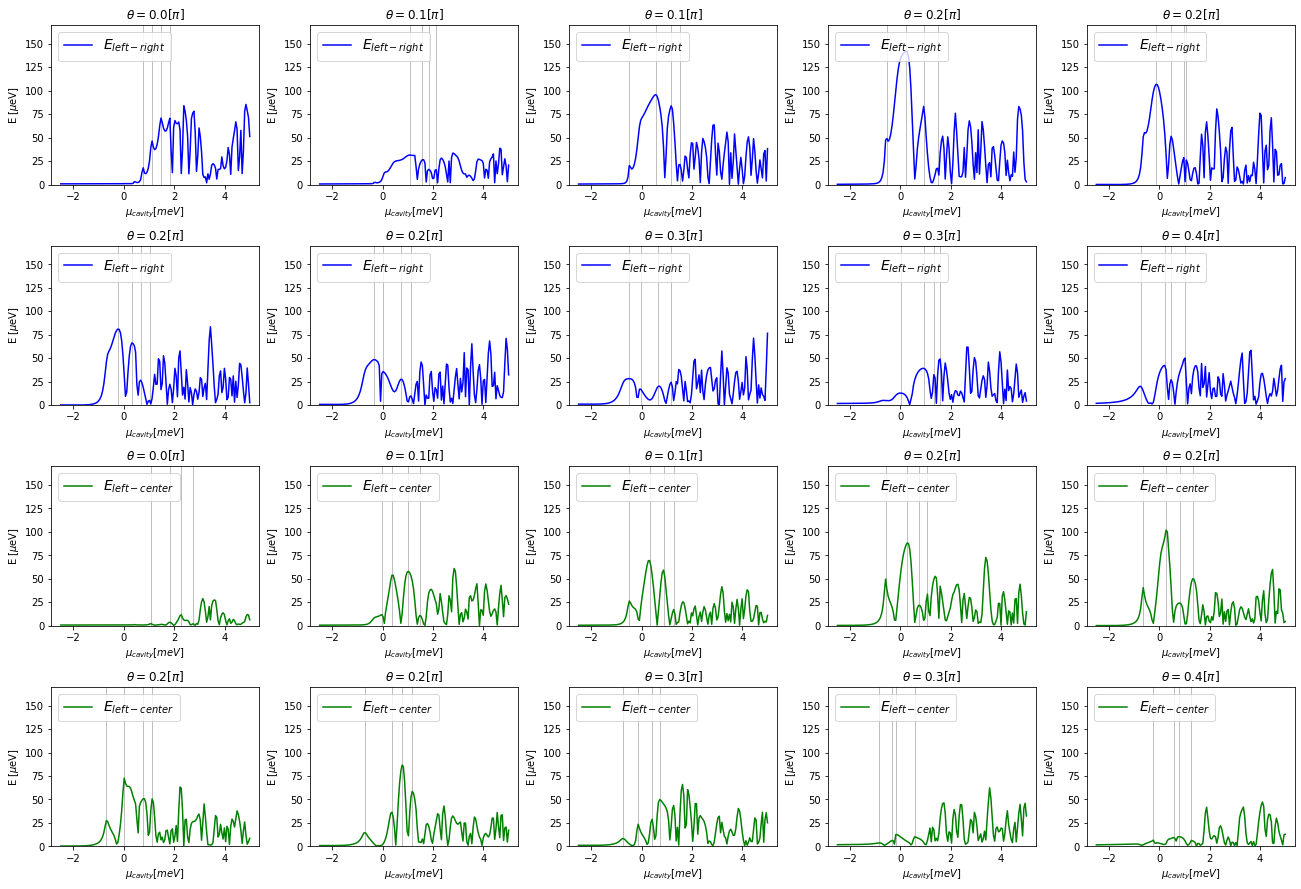

In [202]:
title = r'$\theta = $'
units = r'[$\pi$]' 
pt.plot_couplings(n_geometries, geometries, mus_qd_units, geometries_peaks, geometries_couplings, title, units)

In [203]:
peaks_geometry_dependence, widths_geometry_dependence = tl.extract_peaks(geometries_peaks, geometries_couplings, geometries_widths)

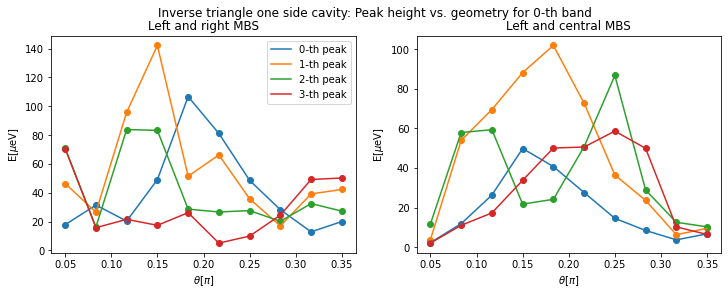

In [204]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in peaks_geometry_dependence[pair]:
        level = 1e6*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[$\mu$eV]')
        i += 1
ax[0].legend()
fig_title = exp_title+r'Peak height vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

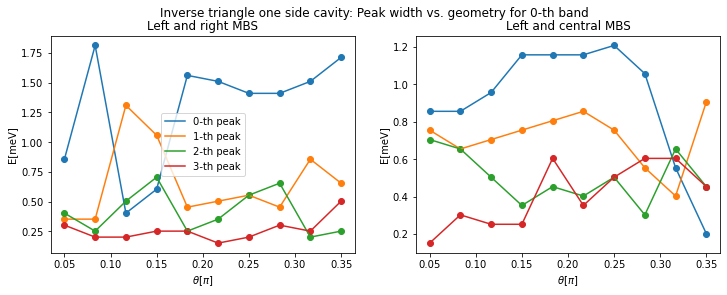

In [205]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th peak')

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for pair in range(2):
    i = 0
    for level in widths_geometry_dependence[pair]:
        level = 1e3*level
        ax[pair].plot(geometries, level, label=labels[i])
        ax[pair].scatter(geometries, level)
        ax[pair].set_xlabel(geometry_parameter)
        ax[pair].set_ylabel(r'E[meV]')
        i += 1

ax[0].legend()
fig_title = exp_title+r'Peak width vs. geometry for '+str(index)+'-th band'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

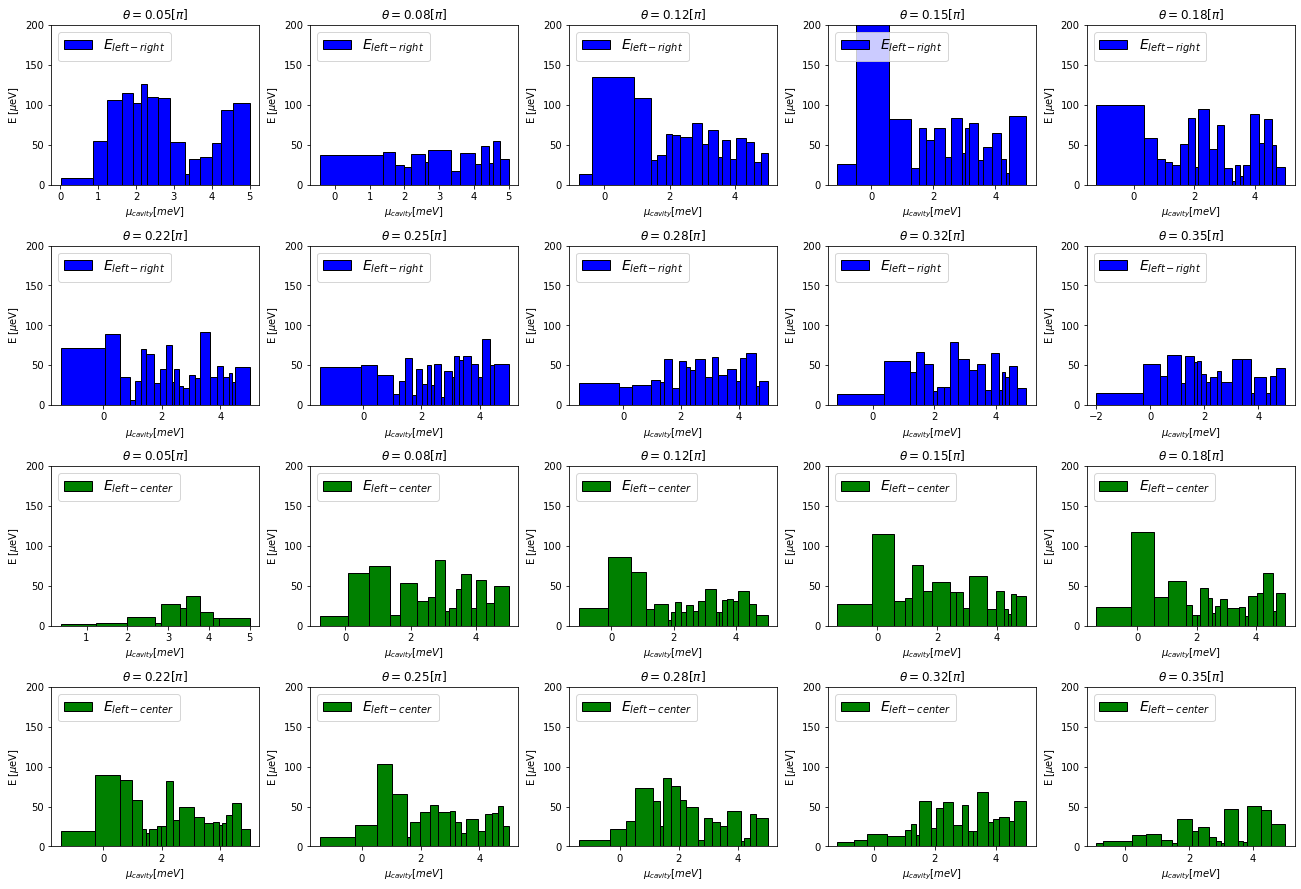

In [206]:
pt.plot_average_couplings(n_geometries, geometries, geometries_averages, title, units)

### Analyze results: all bands

In [207]:
bands_average_heights = []
bands_average_widhts = []
bands_peaks = []
bands_peaks_widhts = []

# analyze data of each band
for index in range(7):
    file = 'band_'+str(index)+'th.pickle'
    # open raw simulation result
    with open(path+file, 'rb') as data:
        result = pickle.load(data)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_peaks_widhts = []

    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_peaks_widhts = []

        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, sign=1, prominence=0)
        full_data.append(couplings)

        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_peaks_widhts.append(np.mean(averages[pair][2][:n_peaks]))

            single_geometry_average_height.append(np.mean(averages[pair][1]))
            single_geometry_average_width.append(np.mean(averages[pair][2])) 

        geometries_peaks.append(single_geometry_peaks)
        geometries_peaks_widhts.append(single_geometry_peaks_widhts)

        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)

    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)

    bands_peaks.append(geometries_peaks)
    bands_peaks_widhts.append(geometries_peaks_widhts)

In [208]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)
bands_peaks_widhts = np.array(bands_peaks_widhts)

In [209]:
np.shape(bands_peaks)

(7, 10, 3, 4)

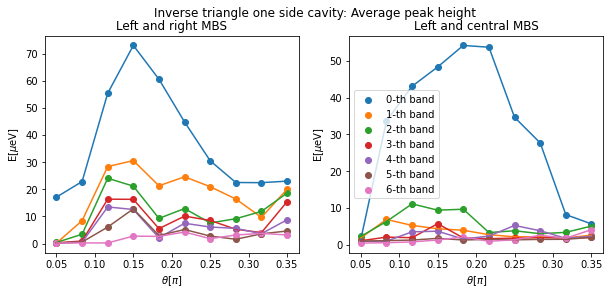

In [210]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
ax[-1].legend()
fig_title = exp_title+r'Average peak height'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

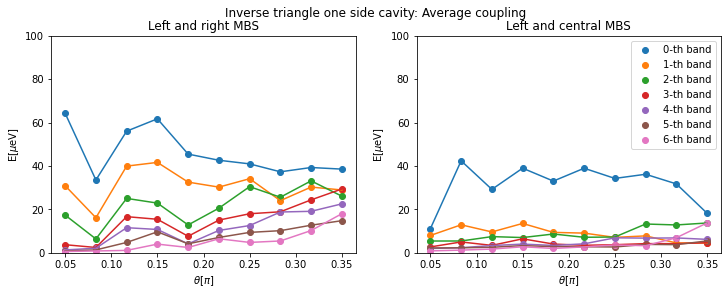

In [211]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 100*bands_average_heights[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 100)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average coupling'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left and central MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')

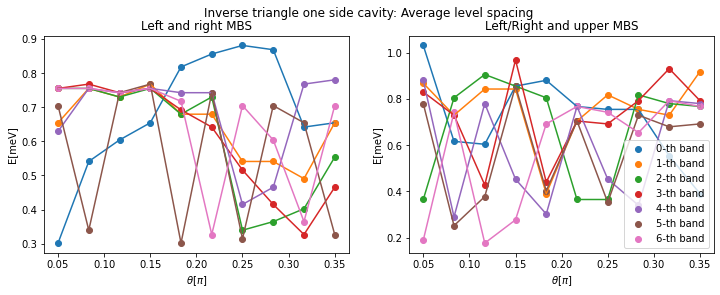

In [212]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for n_col in range(2):
    for i in range(7):
        m = 1000*bands_peaks_widhts[i, :, n_col]
        ax[n_col].plot(geometries, m)
        ax[n_col].scatter(geometries, m, label=labels[i])
    ax[n_col].set_xlabel(geometry_parameter)
    ax[n_col].set_ylabel(r'E[meV]')
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()
fig_title = exp_title+r'Average level spacing'
fig.suptitle(fig_title)
ax[0].set_title(r'Left and right MBS')
ax[1].set_title(r'Left/Right and upper MBS')
plt.savefig(path+fig_title.replace(' ', '_')+'.png')